In [1]:
import pycaret as pc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
from tensorflow import keras
import tensorflow as tf
from sklearn.metrics import auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import seaborn as sb
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import shap

In [4]:
df = pd.read_csv('Data 4020705 - Copy.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25224 entries, 0 to 25223
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   patientid                  25224 non-null  int64  
 1   Tamponade                  25224 non-null  int64  
 2   Gender                     25224 non-null  int64  
 3   Diabetes                   25224 non-null  int64  
 4   Positive family history    25224 non-null  int64  
 5   Dyslipidemia               25224 non-null  int64  
 6   Current cigarette smoking  25224 non-null  int64  
 7   Current opium consumption  25224 non-null  int64  
 8   Hx of Angioplasty POBA     25224 non-null  int64  
 9   Hx of renal failure        25224 non-null  int64  
 10  MI <24h                    25224 non-null  int64  
 11  1d < MI < 7d               25224 non-null  int64  
 12  Previous antiplatelet use  25224 non-null  int64  
 13  LM involvement             25224 non-null  int

In [6]:
df1 = df.drop(['patientid'], axis=1)

In [ ]:
df1 = df.drop(['Numberof.arterial.graft','Numberof.vein.graft'
             ,'Graft.number','LOS','In.hospital.mortality',"PO.CVA.TIA","IABP","Po.Renal.failure","Poo.Dialysis",
            "TotalICUHours","TotalVentilationHours",
              'Reoperation','Reoperation.bleeding','Aortic.surgery','Mitral.surgery','Pulmonary.surgery','patientid',
               'Tricuspid.surgery',], axis=1)

In [7]:
df1.head()

,Tamponade,Gender,Diabetes,Positive family history,Dyslipidemia,Current cigarette smoking,Current opium consumption,Hx of Angioplasty POBA,Hx of renal failure,MI <24h,1d < MI < 7d,Previous antiplatelet use,LM involvement,Age,Hgb,Cr,Urgent/emergent surgery,Off-pump surgery,Cabg+valve surgery
0,0,1,0,0,0,0,0,0,1,0,0,0,0,80,12.10,7.97,0,0,0
1,0,1,0,0,0,0,0,0,1,0,0,0,0,61,8.90,1.60,0,0,1
2,0,1,1,0,1,0,0,0,0,0,0,0,1,82,9.50,0.80,0,0,0
3,1,1,0,0,1,1,1,0,1,0,0,1,0,70,12.10,2.20,0,0,0
4,0,0,1,0,1,0,0,0,0,0,1,0,0,57,9.12,1.40,0,0,1


In [81]:
#list for cols to scale
#cols_to_scale = ['Age','EF','Hb','Cr']

#create and fit scaler
#scaler = StandardScaler()
#scaler.fit(df1[cols_to_scale])

#scale selected data
#df1[cols_to_scale] = scaler.transform(df1[cols_to_scale])

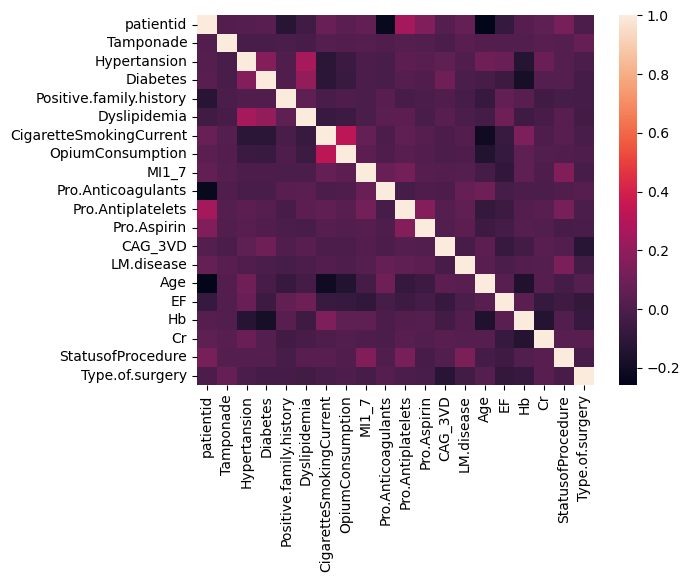

In [6]:
dataplot = sb.heatmap(df.corr())
plt.show()

In [8]:
from pycaret.classification import *
exp=setup(df1, target = 'Tamponade',fix_imbalance=True,
          normalize = True, normalize_method= 'zscore',session_id = 123)

,Description,Value
0,Session id,123
1,Target,Tamponade
2,Target type,Binary
3,Original data shape,"(25224, 19)"
4,Transformed data shape,"(41750, 19)"
5,Transformed train set shape,"(34182, 19)"
6,Transformed test set shape,"(7568, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


In [11]:
X_train=get_config('X_train_transformed')
y_train=get_config('y_train_transformed')
X_test=get_config('X_test_transformed')
X_test=get_config('X_test')

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34182 entries, 17440 to 41743
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     34182 non-null  float32
 1   Diabetes                   34182 non-null  float32
 2   Positive family history    34182 non-null  float32
 3   Dyslipidemia               34182 non-null  float32
 4   Current cigarette smoking  34182 non-null  float32
 5   Current opium consumption  34182 non-null  float32
 6   Hx of Angioplasty POBA     34182 non-null  float32
 7   Hx of renal failure        34182 non-null  float32
 8   MI <24h                    34182 non-null  float32
 9   1d < MI < 7d               34182 non-null  float32
 10  Previous antiplatelet use  34182 non-null  float32
 11  LM involvement             34182 non-null  float32
 12  Age                        34182 non-null  float32
 13  Hgb                        34182 non-null 

In [13]:
X_test.head(3)

,Gender,Diabetes,Positive family history,Dyslipidemia,Current cigarette smoking,Current opium consumption,Hx of Angioplasty POBA,Hx of renal failure,MI <24h,1d < MI < 7d,Previous antiplatelet use,LM involvement,Age,Hgb,Cr,Urgent/emergent surgery,Off-pump surgery,Cabg+valve surgery
17661,1,0,1,1,0,0,0,0,0,0,0,0,56,14.80,0.81,0,0,0
55,1,1,0,1,0,0,0,0,0,0,0,0,76,10.42,0.91,0,0,1
2561,1,1,0,1,0,0,0,0,0,0,0,0,78,10.70,0.80,1,0,0


In [10]:
def calculate_specificity(y, y_pred):
    
    tp, tn, fn, fp = 0.0,0.0,0.0,0.0
    for l,m in enumerate(y):        
        if m==y_pred[l] and m==1:
            tp+=1
        if m==y_pred[l] and m==0:
            tn+=1
        if m!=y_pred[l] and m==1:
            fn+=1
        if m!=y_pred[l] and m==0:
            fp+=1
            
    return tn/(tn+fp)

# add metric to PyCaret
add_metric('specificity', 'specificity', calculate_specificity)

Name                                                       specificity
Display Name                                               specificity
Score Function       <function calculate_specificity at 0x0000020AF...
Scorer                              make_scorer(calculate_specificity)
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: specificity, dtype: object

In [94]:
best = compare_models() # 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity,TT (Sec)
dummy,Dummy Classifier,0.9680,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.3600
lightgbm,Light Gradient Boosting Machine,0.9663,0.5769,0.0000,0.0000,0.0000,-0.0032,-0.0073,0.9982,0.3630
gbc,Gradient Boosting Classifier,0.9660,0.5627,0.0035,0.0625,0.0065,0.0024,0.0063,0.9978,0.3680
rf,Random Forest Classifier,0.9640,0.5671,0.0018,0.0167,0.0032,-0.0041,-0.0060,0.9958,0.4270
et,Extra Trees Classifier,0.9603,0.5794,0.0089,0.0305,0.0137,0.0007,0.0003,0.9918,0.4170
ada,Ada Boost Classifier,0.9581,0.5825,0.0354,0.1011,0.0477,0.0323,0.0383,0.9886,0.3730
dt,Decision Tree Classifier,0.9220,0.5043,0.0583,0.0378,0.0458,0.0071,0.0073,0.9505,0.3470
knn,K Neighbors Classifier,0.8789,0.5221,0.1061,0.0356,0.0532,0.0056,0.0065,0.9045,0.4310
lr,Logistic Regression,0.5323,0.6379,0.6600,0.0442,0.0828,0.0243,0.0663,0.5281,0.3530
ridge,Ridge Classifier,0.5319,0.0000,0.6582,0.0440,0.0826,0.0240,0.0656,0.5277,0.3550


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [98]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
Fold,,,,,,,,
0,0.5227,0.6174,0.6786,0.0440,0.0827,0.0246,0.0687,0.5175
1,0.5227,0.6966,0.7544,0.0493,0.0926,0.0340,0.0952,0.5149
2,0.5198,0.6380,0.6667,0.0438,0.0823,0.0231,0.0642,0.5149
3,0.5374,0.6810,0.7193,0.0487,0.0912,0.0327,0.0887,0.5313
4,0.5176,0.6276,0.6316,0.0415,0.0779,0.0185,0.0514,0.5138
5,0.5374,0.6245,0.6140,0.0422,0.0789,0.0197,0.0527,0.5348
6,0.5320,0.5929,0.5893,0.0395,0.0740,0.0154,0.0419,0.5301
7,0.5382,0.6390,0.6250,0.0422,0.0791,0.0209,0.0563,0.5354
8,0.5603,0.6303,0.6607,0.0466,0.0871,0.0295,0.0767,0.5571


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [99]:
tuned_lr = tune_model(lr, n_iter=200, optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
Fold,,,,,,,,
0,0.5232,0.6176,0.6786,0.0441,0.0828,0.0247,0.0690,0.5181
1,0.5227,0.6966,0.7544,0.0493,0.0926,0.0340,0.0952,0.5149
2,0.5204,0.6381,0.6667,0.0439,0.0823,0.0232,0.0644,0.5155
3,0.5374,0.6809,0.7193,0.0487,0.0912,0.0327,0.0887,0.5313
4,0.5176,0.6277,0.6316,0.0415,0.0779,0.0185,0.0514,0.5138
5,0.5374,0.6245,0.6140,0.0422,0.0789,0.0197,0.0527,0.5348
6,0.5326,0.5929,0.5893,0.0395,0.0741,0.0155,0.0421,0.5307
7,0.5382,0.6390,0.6250,0.0422,0.0791,0.0209,0.0563,0.5354
8,0.5603,0.6303,0.6607,0.0466,0.0871,0.0295,0.0767,0.5571


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [100]:
deep_check(tuned_lr)

deepchecks - WARNING - You are using deepchecks version 0.17.3, however a newer version is available. Deepchecks is frequently updated with major improvements. You should consider upgrading via the "python -m pip install --upgrade deepchecks" command.


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_3VAPZB3AJX3LCC8DVDJDR4E6G">Full Suite</h1>\n<…

In [101]:
lr = create_model('lr',probability_threshold=0.455)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
Fold,,,,,,,,
0,0.4105,0.6174,0.7500,0.0393,0.0747,0.0153,0.0536,0.3994
1,0.4264,0.6966,0.8421,0.0456,0.0866,0.0270,0.0917,0.4125
2,0.4400,0.6380,0.7895,0.0440,0.0834,0.0237,0.0780,0.4283
3,0.4496,0.6810,0.7895,0.0448,0.0847,0.0252,0.0813,0.4383
4,0.4122,0.6276,0.8070,0.0429,0.0814,0.0214,0.0746,0.3991
5,0.4258,0.6245,0.7018,0.0386,0.0731,0.0127,0.0425,0.4166
6,0.4306,0.5929,0.7500,0.0407,0.0771,0.0180,0.0605,0.4201
7,0.4249,0.6390,0.7679,0.0411,0.0781,0.0190,0.0647,0.4137
8,0.4215,0.6303,0.8036,0.0427,0.0810,0.0221,0.0760,0.4090


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [102]:
tuned_lr = tune_model(lr, n_iter=200, optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
Fold,,,,,,,,
0,0.4105,0.6176,0.7500,0.0393,0.0747,0.0153,0.0536,0.3994
1,0.4270,0.6966,0.8596,0.0465,0.0883,0.0288,0.0980,0.4125
2,0.4400,0.6381,0.7895,0.0440,0.0834,0.0237,0.0780,0.4283
3,0.4496,0.6809,0.7895,0.0448,0.0847,0.0252,0.0813,0.4383
4,0.4117,0.6277,0.8070,0.0428,0.0813,0.0214,0.0744,0.3985
5,0.4258,0.6245,0.7018,0.0386,0.0731,0.0127,0.0425,0.4166
6,0.4306,0.5929,0.7500,0.0407,0.0771,0.0180,0.0605,0.4201
7,0.4249,0.6390,0.7679,0.0411,0.0781,0.0190,0.0647,0.4137
8,0.4210,0.6303,0.8036,0.0426,0.0809,0.0220,0.0758,0.4084


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [103]:
df_lr=predict_model(tuned_lr, raw_score=True)
false_positive_rate_lr, true_positive_rate_lr, threshold_lr = roc_curve(df_lr['Tamponade'].values, df_lr['prediction_score_1'].values)
auc_lr = round(metrics.roc_auc_score(df_lr['Tamponade'].values, df_lr['prediction_score_1'].values), 4) 
df_lr.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
0,Logistic Regression,0.4235,0.6123,0.7562,0.0408,0.0774,0.0178,0.0604,0.4125


,Gender,Diabetes,Positive family history,Dyslipidemia,Current cigarette smoking,Current opium consumption,Hx of Angioplasty POBA,Hx of renal failure,MI <24h,1d < MI < 7d,...,Age,Hgb,Cr,Urgent/emergent surgery,Off-pump surgery,Cabg+valve surgery,Tamponade,prediction_label,prediction_score_0,prediction_score_1
17661,1,0,1,1,0,0,0,0,0,0,...,56,14.80,0.81,0,0,0,0,0,0.6064,0.3936
55,1,1,0,1,0,0,0,0,0,0,...,76,10.42,0.91,0,0,1,0,1,0.2467,0.7533
2561,1,1,0,1,0,0,0,0,0,0,...,78,10.70,0.80,1,0,0,0,1,0.4276,0.5724
12670,1,1,0,0,0,0,0,0,0,0,...,58,15.00,1.20,0,0,1,0,1,0.1548,0.8452
1085,1,1,0,1,0,0,0,0,0,0,...,61,12.10,1.04,0,1,0,0,0,0.8595,0.1405


In [105]:
save_model(tuned_lr, model_name = 'lr')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\A3F28~1.VAK\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Gender', 'Diabetes',
                                              'Positive family history',
                                              'Dyslipidemia',
                                              'Current cigarette smoking',
                                              'Current opium consumption',
                                              'Hx of Angioplasty POBA',
                                              'Hx of renal failure', 'MI <24h',
                                              '1d < MI < 7d',
                                              'Previous antiplatelet use'...
                                                                                     multi_class='auto',
                                                                           

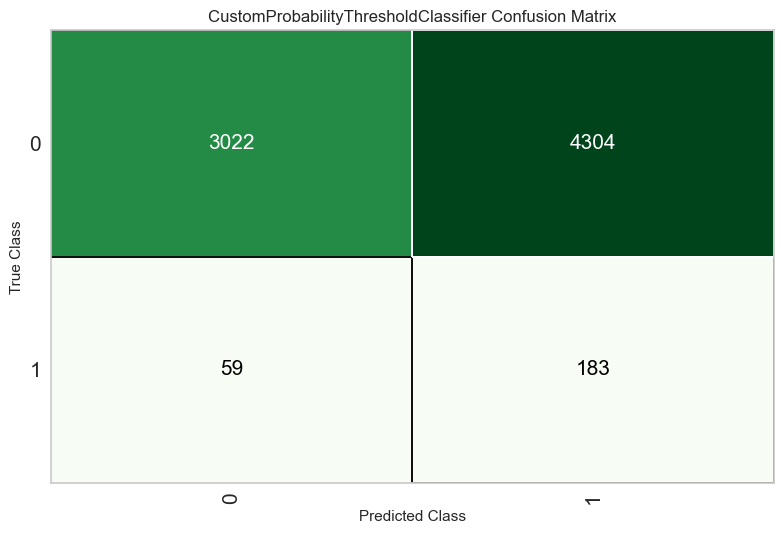

In [106]:
plot_model(tuned_lr, plot = 'confusion_matrix')

In [107]:
print(tuned_lr)

CustomProbabilityThresholdClassifier(C=1.0, class_weight=None,
                                     classifier=LogisticRegression(C=1.0,
                                                                   class_weight=None,
                                                                   dual=False,
                                                                   fit_intercept=True,
                                                                   intercept_scaling=1,
                                                                   l1_ratio=None,
                                                                   max_iter=1000,
                                                                   multi_class='auto',
                                                                   n_jobs=None,
                                                                   penalty='l2',
                                                                   random_state=123,
                          

In [108]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Nov  6 10:06:52 2018

@author: yandexdataschool

Original Code found in:
https://github.com/yandexdataschool/roc_comparison

updated: Raul Sanchez-Vazquez
"""
'The de long solution '

import numpy as np
import scipy.stats
from scipy import stats

# AUC comparison adapted from
# https://github.com/Netflix/vmaf/
def compute_midrank(x):
    """Computes midranks.
    Args:
       x - a 1D numpy array
    Returns:
       array of midranks
    """
    J = np.argsort(x)
    Z = x[J]
    N = len(x)
    T = np.zeros(N, dtype=float)
    i = 0
    while i < N:
        j = i
        while j < N and Z[j] == Z[i]:
            j += 1
        T[i:j] = 0.5*(i + j - 1)
        i = j
    T2 = np.empty(N, dtype=float)
    # Note(kazeevn) +1 is due to Python using 0-based indexing
    # instead of 1-based in the AUC formula in the paper
    T2[J] = T + 1
    return T2


def compute_midrank_weight(x, sample_weight):
    """Computes midranks.
    Args:
       x - a 1D numpy array
    Returns:
       array of midranks
    """
    J = np.argsort(x)
    Z = x[J]
    cumulative_weight = np.cumsum(sample_weight[J])
    N = len(x)
    T = np.zeros(N, dtype=float)
    i = 0
    while i < N:
        j = i
        while j < N and Z[j] == Z[i]:
            j += 1
        T[i:j] = cumulative_weight[i:j].mean()
        i = j
    T2 = np.empty(N, dtype=float)
    T2[J] = T
    return T2


def fastDeLong(predictions_sorted_transposed, label_1_count, sample_weight):
    if sample_weight is None:
        return fastDeLong_no_weights(predictions_sorted_transposed, label_1_count)
    else:
        return fastDeLong_weights(predictions_sorted_transposed, label_1_count, sample_weight)


def fastDeLong_weights(predictions_sorted_transposed, label_1_count, sample_weight):
    """
    The fast version of DeLong's method for computing the covariance of
    unadjusted AUC.
    Args:
       predictions_sorted_transposed: a 2D numpy.array[n_classifiers, n_examples]
          sorted such as the examples with label "1" are first
    Returns:
       (AUC value, DeLong covariance)
    Reference:
     @article{sun2014fast,
       title={Fast Implementation of DeLong's Algorithm for
              Comparing the Areas Under Correlated Receiver Oerating Characteristic Curves},
       author={Xu Sun and Weichao Xu},
       journal={IEEE Signal Processing Letters},
       volume={21},
       number={11},
       pages={1389--1393},
       year={2014},
       publisher={IEEE}
     }
    """
    # Short variables are named as they are in the paper
    m = label_1_count
    n = predictions_sorted_transposed.shape[1] - m
    positive_examples = predictions_sorted_transposed[:, :m]
    negative_examples = predictions_sorted_transposed[:, m:]
    k = predictions_sorted_transposed.shape[0]

    tx = np.empty([k, m], dtype=float)
    ty = np.empty([k, n], dtype=float)
    tz = np.empty([k, m + n], dtype=float)
    for r in range(k):
        tx[r, :] = compute_midrank_weight(positive_examples[r, :], sample_weight[:m])
        ty[r, :] = compute_midrank_weight(negative_examples[r, :], sample_weight[m:])
        tz[r, :] = compute_midrank_weight(predictions_sorted_transposed[r, :], sample_weight)
    total_positive_weights = sample_weight[:m].sum()
    total_negative_weights = sample_weight[m:].sum()
    pair_weights = np.dot(sample_weight[:m, np.newaxis], sample_weight[np.newaxis, m:])
    total_pair_weights = pair_weights.sum()
    aucs = (sample_weight[:m]*(tz[:, :m] - tx)).sum(axis=1) / total_pair_weights
    v01 = (tz[:, :m] - tx[:, :]) / total_negative_weights
    v10 = 1. - (tz[:, m:] - ty[:, :]) / total_positive_weights
    sx = np.cov(v01)
    sy = np.cov(v10)
    delongcov = sx / m + sy / n
    return aucs, delongcov


def fastDeLong_no_weights(predictions_sorted_transposed, label_1_count):
    """
    The fast version of DeLong's method for computing the covariance of
    unadjusted AUC.
    Args:
       predictions_sorted_transposed: a 2D numpy.array[n_classifiers, n_examples]
          sorted such as the examples with label "1" are first
    Returns:
       (AUC value, DeLong covariance)
    Reference:
     @article{sun2014fast,
       title={Fast Implementation of DeLong's Algorithm for
              Comparing the Areas Under Correlated Receiver Oerating
              Characteristic Curves},
       author={Xu Sun and Weichao Xu},
       journal={IEEE Signal Processing Letters},
       volume={21},
       number={11},
       pages={1389--1393},
       year={2014},
       publisher={IEEE}
     }
    """
    # Short variables are named as they are in the paper
    m = label_1_count
    n = predictions_sorted_transposed.shape[1] - m
    positive_examples = predictions_sorted_transposed[:, :m]
    negative_examples = predictions_sorted_transposed[:, m:]
    k = predictions_sorted_transposed.shape[0]

    tx = np.empty([k, m], dtype=float)
    ty = np.empty([k, n], dtype=float)
    tz = np.empty([k, m + n], dtype=float)
    for r in range(k):
        tx[r, :] = compute_midrank(positive_examples[r, :])
        ty[r, :] = compute_midrank(negative_examples[r, :])
        tz[r, :] = compute_midrank(predictions_sorted_transposed[r, :])
    aucs = tz[:, :m].sum(axis=1) / m / n - float(m + 1.0) / 2.0 / n
    v01 = (tz[:, :m] - tx[:, :]) / n
    v10 = 1.0 - (tz[:, m:] - ty[:, :]) / m
    sx = np.cov(v01)
    sy = np.cov(v10)
    delongcov = sx / m + sy / n
    return aucs, delongcov


def calc_pvalue(aucs, sigma):
    """Computes log(10) of p-values.
    Args:
       aucs: 1D array of AUCs
       sigma: AUC DeLong covariances
    Returns:
       log10(pvalue)
    """
    l = np.array([[1, -1]])
    z = np.abs(np.diff(aucs)) / np.sqrt(np.dot(np.dot(l, sigma), l.T))
    return np.log10(2) + scipy.stats.norm.logsf(z, loc=0, scale=1) / np.log(10)


def compute_ground_truth_statistics(ground_truth, sample_weight):
    assert np.array_equal(np.unique(ground_truth), [0, 1])
    order = (-ground_truth).argsort()
    label_1_count = int(ground_truth.sum())
    if sample_weight is None:
        ordered_sample_weight = None
    else:
        ordered_sample_weight = sample_weight[order]

    return order, label_1_count, ordered_sample_weight


def delong_roc_variance(ground_truth, predictions, sample_weight=None):
    """
    Computes ROC AUC variance for a single set of predictions
    Args:
       ground_truth: np.array of 0 and 1
       predictions: np.array of floats of the probability of being class 1
    """
    order, label_1_count, ordered_sample_weight = compute_ground_truth_statistics(
        ground_truth, sample_weight)
    predictions_sorted_transposed = predictions[np.newaxis, order]
    aucs, delongcov = fastDeLong(predictions_sorted_transposed, label_1_count, ordered_sample_weight)
    assert len(aucs) == 1, "There is a bug in the code, please forward this to the developers"
    return aucs[0], delongcov

df_lr['Tamponade'].values, df_lr['prediction_score_1'].values
alpha = .95
y_pred = df_lr['prediction_score_1'].values
y_true = df_lr['Tamponade'].values

auc, auc_cov = delong_roc_variance(
    y_true,
    y_pred)

auc_std = np.sqrt(auc_cov)
lower_upper_q = np.abs(np.array([0, 1]) - (1 - alpha) / 2)

ci = stats.norm.ppf(
    lower_upper_q,
    loc=auc,
    scale=auc_std)

ci[ci > 1] = 1

print('AUC:', auc)
print('AUC COV:', auc_cov)
print('95% AUC CI:', ci)

AUC: 0.6122693880958344
AUC COV: 0.000326951544457368
95% AUC CI: [0.57682971 0.64770907]


In [11]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
Fold,,,,,,,,
0,0.9683,0.5990,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
1,0.9677,0.5867,0.0175,0.5000,0.0339,0.0318,0.0891,0.9994
2,0.9666,0.5348,0.0000,0.0000,0.0000,-0.0022,-0.0061,0.9988
3,0.9666,0.6313,0.0000,0.0000,0.0000,-0.0022,-0.0061,0.9988
4,0.9666,0.5374,0.0000,0.0000,0.0000,-0.0022,-0.0061,0.9988
5,0.9655,0.5224,0.0000,0.0000,0.0000,-0.0043,-0.0087,0.9977
6,0.9654,0.5220,0.0000,0.0000,0.0000,-0.0052,-0.0096,0.9971
7,0.9677,0.5444,0.0179,0.3333,0.0339,0.0308,0.0710,0.9988
8,0.9677,0.5997,0.0000,0.0000,0.0000,-0.0011,-0.0043,0.9994


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [11]:
tuned_lightgbm = tune_model(lightgbm, n_iter=150, optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
Fold,,,,,,,,
0,0.7055,0.6340,0.4643,0.0504,0.0909,0.0357,0.0685,0.7135
1,0.6427,0.6828,0.5965,0.0530,0.0973,0.0404,0.0884,0.6442
2,0.6835,0.6407,0.4912,0.0502,0.0911,0.0345,0.0688,0.6899
3,0.6121,0.6096,0.5614,0.0462,0.0854,0.0274,0.0634,0.6138
4,0.6240,0.6006,0.4912,0.0422,0.0778,0.0195,0.0437,0.6284
5,0.6959,0.5851,0.4211,0.0455,0.0821,0.0253,0.0487,0.7051
6,0.6493,0.5557,0.4286,0.0393,0.0720,0.0147,0.0314,0.6565
7,0.6788,0.6038,0.4643,0.0462,0.0840,0.0279,0.0564,0.6858
8,0.6918,0.6366,0.4643,0.0481,0.0872,0.0316,0.0622,0.6992


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


In [14]:
deep_check(tuned_lightgbm)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_6O5OG0VTZ34AJNKFUE1J9AS03">Full Suite</h1>\n<…

In [19]:
lightgbm = create_model('lightgbm',probability_threshold=0.403)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
Fold,,,,,,,,
0,0.9621,0.5972,0.0000,0.0000,0.0000,-0.0105,-0.0143,0.9936
1,0.9655,0.6107,0.0175,0.1667,0.0317,0.0258,0.0444,0.9971
2,0.9638,0.5242,0.0000,0.0000,0.0000,-0.0071,-0.0115,0.9959
3,0.9660,0.6365,0.0175,0.2000,0.0323,0.0272,0.0506,0.9977
4,0.9649,0.5307,0.0175,0.1429,0.0312,0.0244,0.0395,0.9965
5,0.9655,0.5559,0.0175,0.1667,0.0317,0.0258,0.0444,0.9971
6,0.9620,0.5169,0.0000,0.0000,0.0000,-0.0105,-0.0143,0.9936
7,0.9637,0.5276,0.0179,0.1000,0.0303,0.0209,0.0294,0.9947
8,0.9649,0.6233,0.0000,0.0000,0.0000,-0.0062,-0.0106,0.9965


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [20]:
tuned_lightgbm = tune_model(lightgbm, n_iter=150, optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
Fold,,,,,,,,
0,0.9666,0.6029,0.0000,0.0000,0.0000,-0.0032,-0.0075,0.9982
1,0.9666,0.6470,0.0000,0.0000,0.0000,-0.0022,-0.0061,0.9988
2,0.9643,0.6313,0.0000,0.0000,0.0000,-0.0062,-0.0107,0.9965
3,0.9655,0.6536,0.0000,0.0000,0.0000,-0.0043,-0.0087,0.9977
4,0.9677,0.5550,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
5,0.9649,0.5801,0.0000,0.0000,0.0000,-0.0052,-0.0097,0.9971
6,0.9649,0.5801,0.0000,0.0000,0.0000,-0.0062,-0.0106,0.9965
7,0.9654,0.5702,0.0000,0.0000,0.0000,-0.0052,-0.0096,0.9971
8,0.9643,0.6319,0.0000,0.0000,0.0000,-0.0071,-0.0114,0.9959


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


In [21]:
df_lightgbm=predict_model(tuned_lightgbm, raw_score=True)
false_positive_rate_lightgbm, true_positive_rate_lightgbm, threshold_lightgbm = roc_curve(df_lightgbm['Tamponade'].values,df_lightgbm['prediction_score_1'].values)
auc_lightgbm = round(metrics.roc_auc_score(df_lightgbm['Tamponade'].values, df_lightgbm['prediction_score_1'].values), 4) 
df_lightgbm.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
0,Light Gradient Boosting Machine,0.9658,0.5873,0.0041,0.0526,0.0077,0.0030,0.0059,0.9975


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


,Gender,Diabetes,Positive family history,Dyslipidemia,Current cigarette smoking,Current opium consumption,Hx of Angioplasty POBA,Hx of renal failure,MI <24h,1d < MI < 7d,...,Age,Hgb,Cr,Urgent/emergent surgery,Off-pump surgery,Cabg+valve surgery,Tamponade,prediction_label,prediction_score_0,prediction_score_1
17661,1,0,1,1,0,0,0,0,0,0,...,56,14.80,0.81,0,0,0,0,0,0.9739,0.0261
55,1,1,0,1,0,0,0,0,0,0,...,76,10.42,0.91,0,0,1,0,0,0.9005,0.0995
2561,1,1,0,1,0,0,0,0,0,0,...,78,10.70,0.80,1,0,0,0,0,0.8492,0.1508
12670,1,1,0,0,0,0,0,0,0,0,...,58,15.00,1.20,0,0,1,0,0,0.8900,0.1100
1085,1,1,0,1,0,0,0,0,0,0,...,61,12.10,1.04,0,1,0,0,0,0.9945,0.0055


In [47]:
save_model(tuned_lightgbm, model_name = 'lightgbm')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\A3F28~1.VAK\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Gender', 'Diabetes',
                                              'Positive family history',
                                              'Dyslipidemia',
                                              'Current cigarette smoking',
                                              'Current opium consumption',
                                              'Hx of Angioplasty POBA',
                                              'Hx of renal failure', 'MI <24h',
                                              '1d < MI < 7d',
                                              'Previous antiplatelet use'...
                                                       colsample_bytree=1.0,
                                                       feature_fraction=0.9,
                          

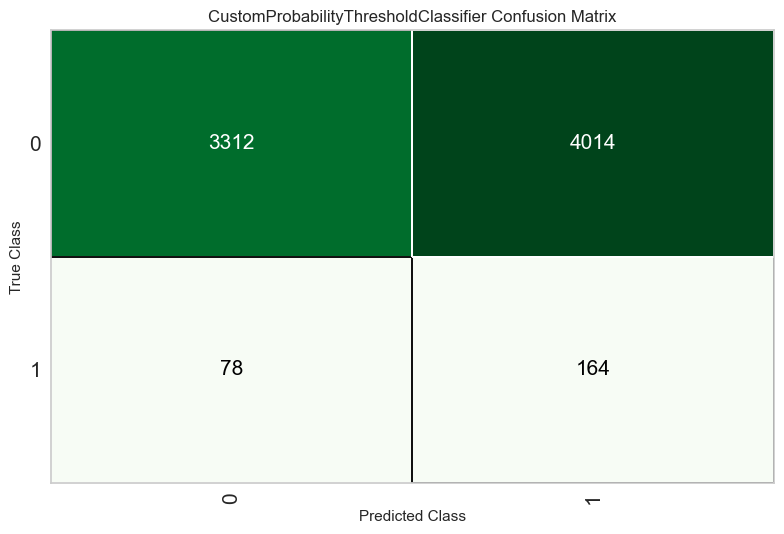

In [16]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

In [35]:
print(tuned_lightgbm)

CustomProbabilityThresholdClassifier(bagging_fraction=0.8, bagging_freq=5,
                                     boosting_type='gbdt', class_weight=None,
                                     classifier=LGBMClassifier(bagging_fraction=0.8,
                                                               bagging_freq=5,
                                                               boosting_type='gbdt',
                                                               class_weight=None,
                                                               colsample_bytree=1.0,
                                                               feature_fraction=0.9,
                                                               importance_type='split',
                                                               learning_rate=0.3,
                                                               max_depth=-1,
                                                               min_child_samples=6,
               

In [56]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Nov  6 10:06:52 2018

@author: yandexdataschool

Original Code found in:
https://github.com/yandexdataschool/roc_comparison

updated: Raul Sanchez-Vazquez
"""
'The de long solution '

import numpy as np
import scipy.stats
from scipy import stats

# AUC comparison adapted from
# https://github.com/Netflix/vmaf/
def compute_midrank(x):
    """Computes midranks.
    Args:
       x - a 1D numpy array
    Returns:
       array of midranks
    """
    J = np.argsort(x)
    Z = x[J]
    N = len(x)
    T = np.zeros(N, dtype=float)
    i = 0
    while i < N:
        j = i
        while j < N and Z[j] == Z[i]:
            j += 1
        T[i:j] = 0.5*(i + j - 1)
        i = j
    T2 = np.empty(N, dtype=float)
    # Note(kazeevn) +1 is due to Python using 0-based indexing
    # instead of 1-based in the AUC formula in the paper
    T2[J] = T + 1
    return T2


def compute_midrank_weight(x, sample_weight):
    """Computes midranks.
    Args:
       x - a 1D numpy array
    Returns:
       array of midranks
    """
    J = np.argsort(x)
    Z = x[J]
    cumulative_weight = np.cumsum(sample_weight[J])
    N = len(x)
    T = np.zeros(N, dtype=float)
    i = 0
    while i < N:
        j = i
        while j < N and Z[j] == Z[i]:
            j += 1
        T[i:j] = cumulative_weight[i:j].mean()
        i = j
    T2 = np.empty(N, dtype=float)
    T2[J] = T
    return T2


def fastDeLong(predictions_sorted_transposed, label_1_count, sample_weight):
    if sample_weight is None:
        return fastDeLong_no_weights(predictions_sorted_transposed, label_1_count)
    else:
        return fastDeLong_weights(predictions_sorted_transposed, label_1_count, sample_weight)


def fastDeLong_weights(predictions_sorted_transposed, label_1_count, sample_weight):
    """
    The fast version of DeLong's method for computing the covariance of
    unadjusted AUC.
    Args:
       predictions_sorted_transposed: a 2D numpy.array[n_classifiers, n_examples]
          sorted such as the examples with label "1" are first
    Returns:
       (AUC value, DeLong covariance)
    Reference:
     @article{sun2014fast,
       title={Fast Implementation of DeLong's Algorithm for
              Comparing the Areas Under Correlated Receiver Oerating Characteristic Curves},
       author={Xu Sun and Weichao Xu},
       journal={IEEE Signal Processing Letters},
       volume={21},
       number={11},
       pages={1389--1393},
       year={2014},
       publisher={IEEE}
     }
    """
    # Short variables are named as they are in the paper
    m = label_1_count
    n = predictions_sorted_transposed.shape[1] - m
    positive_examples = predictions_sorted_transposed[:, :m]
    negative_examples = predictions_sorted_transposed[:, m:]
    k = predictions_sorted_transposed.shape[0]

    tx = np.empty([k, m], dtype=float)
    ty = np.empty([k, n], dtype=float)
    tz = np.empty([k, m + n], dtype=float)
    for r in range(k):
        tx[r, :] = compute_midrank_weight(positive_examples[r, :], sample_weight[:m])
        ty[r, :] = compute_midrank_weight(negative_examples[r, :], sample_weight[m:])
        tz[r, :] = compute_midrank_weight(predictions_sorted_transposed[r, :], sample_weight)
    total_positive_weights = sample_weight[:m].sum()
    total_negative_weights = sample_weight[m:].sum()
    pair_weights = np.dot(sample_weight[:m, np.newaxis], sample_weight[np.newaxis, m:])
    total_pair_weights = pair_weights.sum()
    aucs = (sample_weight[:m]*(tz[:, :m] - tx)).sum(axis=1) / total_pair_weights
    v01 = (tz[:, :m] - tx[:, :]) / total_negative_weights
    v10 = 1. - (tz[:, m:] - ty[:, :]) / total_positive_weights
    sx = np.cov(v01)
    sy = np.cov(v10)
    delongcov = sx / m + sy / n
    return aucs, delongcov


def fastDeLong_no_weights(predictions_sorted_transposed, label_1_count):
    """
    The fast version of DeLong's method for computing the covariance of
    unadjusted AUC.
    Args:
       predictions_sorted_transposed: a 2D numpy.array[n_classifiers, n_examples]
          sorted such as the examples with label "1" are first
    Returns:
       (AUC value, DeLong covariance)
    Reference:
     @article{sun2014fast,
       title={Fast Implementation of DeLong's Algorithm for
              Comparing the Areas Under Correlated Receiver Oerating
              Characteristic Curves},
       author={Xu Sun and Weichao Xu},
       journal={IEEE Signal Processing Letters},
       volume={21},
       number={11},
       pages={1389--1393},
       year={2014},
       publisher={IEEE}
     }
    """
    # Short variables are named as they are in the paper
    m = label_1_count
    n = predictions_sorted_transposed.shape[1] - m
    positive_examples = predictions_sorted_transposed[:, :m]
    negative_examples = predictions_sorted_transposed[:, m:]
    k = predictions_sorted_transposed.shape[0]

    tx = np.empty([k, m], dtype=float)
    ty = np.empty([k, n], dtype=float)
    tz = np.empty([k, m + n], dtype=float)
    for r in range(k):
        tx[r, :] = compute_midrank(positive_examples[r, :])
        ty[r, :] = compute_midrank(negative_examples[r, :])
        tz[r, :] = compute_midrank(predictions_sorted_transposed[r, :])
    aucs = tz[:, :m].sum(axis=1) / m / n - float(m + 1.0) / 2.0 / n
    v01 = (tz[:, :m] - tx[:, :]) / n
    v10 = 1.0 - (tz[:, m:] - ty[:, :]) / m
    sx = np.cov(v01)
    sy = np.cov(v10)
    delongcov = sx / m + sy / n
    return aucs, delongcov


def calc_pvalue(aucs, sigma):
    """Computes log(10) of p-values.
    Args:
       aucs: 1D array of AUCs
       sigma: AUC DeLong covariances
    Returns:
       log10(pvalue)
    """
    l = np.array([[1, -1]])
    z = np.abs(np.diff(aucs)) / np.sqrt(np.dot(np.dot(l, sigma), l.T))
    return np.log10(2) + scipy.stats.norm.logsf(z, loc=0, scale=1) / np.log(10)


def compute_ground_truth_statistics(ground_truth, sample_weight):
    assert np.array_equal(np.unique(ground_truth), [0, 1])
    order = (-ground_truth).argsort()
    label_1_count = int(ground_truth.sum())
    if sample_weight is None:
        ordered_sample_weight = None
    else:
        ordered_sample_weight = sample_weight[order]

    return order, label_1_count, ordered_sample_weight


def delong_roc_variance(ground_truth, predictions, sample_weight=None):
    """
    Computes ROC AUC variance for a single set of predictions
    Args:
       ground_truth: np.array of 0 and 1
       predictions: np.array of floats of the probability of being class 1
    """
    order, label_1_count, ordered_sample_weight = compute_ground_truth_statistics(
        ground_truth, sample_weight)
    predictions_sorted_transposed = predictions[np.newaxis, order]
    aucs, delongcov = fastDeLong(predictions_sorted_transposed, label_1_count, ordered_sample_weight)
    assert len(aucs) == 1, "There is a bug in the code, please forward this to the developers"
    return aucs[0], delongcov

df_lightgbm['Tamponade'].values, df_lightgbm['prediction_score_1'].values
alpha = .95
y_pred = df_lightgbm['prediction_score_1'].values
y_true = df_lightgbm['Tamponade'].values

auc, auc_cov = delong_roc_variance(
    y_true,
    y_pred)

auc_std = np.sqrt(auc_cov)
lower_upper_q = np.abs(np.array([0, 1]) - (1 - alpha) / 2)

ci = stats.norm.ppf(
    lower_upper_q,
    loc=auc,
    scale=auc_std)

ci[ci > 1] = 1

print('AUC:', auc)
print('AUC COV:', auc_cov)
print('95% AUC CI:', ci)

AUC: 0.6156999411131643
AUC COV: 0.0003132654818130442
95% AUC CI: [0.58100994 0.65038995]


In [22]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
Fold,,,,,,,,
0,0.9655,0.5913,0.0000,0.0000,0.0000,-0.0052,-0.0096,0.9971
1,0.9632,0.6305,0.0000,0.0000,0.0000,-0.0080,-0.0123,0.9953
2,0.9638,0.6263,0.0000,0.0000,0.0000,-0.0071,-0.0115,0.9959
3,0.9655,0.6134,0.0175,0.1667,0.0317,0.0258,0.0444,0.9971
4,0.9655,0.5764,0.0000,0.0000,0.0000,-0.0043,-0.0087,0.9977
5,0.9649,0.4966,0.0000,0.0000,0.0000,-0.0052,-0.0097,0.9971
6,0.9620,0.5423,0.0000,0.0000,0.0000,-0.0105,-0.0143,0.9936
7,0.9654,0.5000,0.0000,0.0000,0.0000,-0.0052,-0.0096,0.9971
8,0.9615,0.5760,0.0000,0.0000,0.0000,-0.0113,-0.0150,0.9930


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [24]:
tuned_rf = tune_model(rf, n_iter=150, optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
Fold,,,,,,,,
0,0.7333,0.6300,0.4464,0.0538,0.0960,0.0417,0.0752,0.7427
1,0.7305,0.6824,0.5088,0.0608,0.1086,0.0541,0.0982,0.7379
2,0.7146,0.6310,0.4211,0.0485,0.0870,0.0309,0.0572,0.7244
3,0.7254,0.6160,0.4035,0.0485,0.0866,0.0308,0.0557,0.7361
4,0.7310,0.5878,0.3333,0.0417,0.0741,0.0177,0.0313,0.7443
5,0.7282,0.5865,0.3509,0.0432,0.0769,0.0206,0.0368,0.7408
6,0.7343,0.5364,0.3036,0.0380,0.0676,0.0119,0.0209,0.7484
7,0.7099,0.6141,0.4821,0.0529,0.0954,0.0405,0.0772,0.7174
8,0.7139,0.6304,0.3929,0.0446,0.0801,0.0246,0.0458,0.7244


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


In [25]:
deep_check(tuned_rf)

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_7E9BHWP7UWNSGG9BSH9SDXIVC">Full Suite</h1>\n<…

In [26]:
rf = create_model('rf',probability_threshold=0.397)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
Fold,,,,,,,,
0,0.9592,0.5913,0.0000,0.0000,0.0000,-0.0143,-0.0173,0.9906
1,0.9575,0.6305,0.0000,0.0000,0.0000,-0.0157,-0.0185,0.9895
2,0.9587,0.6263,0.0175,0.0556,0.0267,0.0113,0.0134,0.9901
3,0.9592,0.6134,0.0351,0.1053,0.0526,0.0371,0.0431,0.9901
4,0.9587,0.5764,0.0000,0.0000,0.0000,-0.0144,-0.0175,0.9906
5,0.9592,0.4966,0.0175,0.0588,0.0270,0.0124,0.0148,0.9906
6,0.9592,0.5423,0.0179,0.0556,0.0270,0.0118,0.0138,0.9901
7,0.9603,0.5000,0.0000,0.0000,0.0000,-0.0129,-0.0162,0.9918
8,0.9552,0.5760,0.0000,0.0000,0.0000,-0.0188,-0.0208,0.9865


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [27]:
tuned_rf = tune_model(rf, n_iter=150, optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
Fold,,,,,,,,
0,0.3635,0.6300,0.8036,0.0389,0.0741,0.0145,0.0563,0.3491
1,0.3703,0.6824,0.8772,0.0433,0.0825,0.0224,0.0857,0.3534
2,0.3715,0.6310,0.7895,0.0394,0.0750,0.0144,0.0544,0.3575
3,0.4173,0.6160,0.7719,0.0415,0.0788,0.0187,0.0640,0.4055
4,0.3511,0.5878,0.8421,0.0405,0.0773,0.0167,0.0665,0.3347
5,0.3618,0.5865,0.7544,0.0372,0.0709,0.0100,0.0383,0.3487
6,0.3977,0.5364,0.6964,0.0359,0.0684,0.0085,0.0304,0.3879
7,0.3926,0.6141,0.7321,0.0373,0.0711,0.0114,0.0411,0.3815
8,0.3864,0.6304,0.8214,0.0411,0.0783,0.0190,0.0704,0.3721


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


In [28]:
df_rf=predict_model(tuned_rf, raw_score=True)
false_positive_rate_rf, true_positive_rate_rf, threshold_rf = roc_curve(df_rf['Tamponade'].values,df_rf['prediction_score_1'].values)
auc_rf = round(metrics.roc_auc_score(df_rf['Tamponade'].values, df_rf['prediction_score_1'].values), 4) 
df_rf.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
0,Random Forest Classifier,0.3827,0.6074,0.7975,0.0401,0.0763,0.0164,0.0609,0.3690


,Gender,Diabetes,Positive family history,Dyslipidemia,Current cigarette smoking,Current opium consumption,Hx of Angioplasty POBA,Hx of renal failure,MI <24h,1d < MI < 7d,...,Age,Hgb,Cr,Urgent/emergent surgery,Off-pump surgery,Cabg+valve surgery,Tamponade,prediction_label,prediction_score_0,prediction_score_1
17661,1,0,1,1,0,0,0,0,0,0,...,56,14.80,0.81,0,0,0,0,0,0.6032,0.3968
55,1,1,0,1,0,0,0,0,0,0,...,76,10.42,0.91,0,0,1,0,1,0.3962,0.6038
2561,1,1,0,1,0,0,0,0,0,0,...,78,10.70,0.80,1,0,0,0,1,0.5700,0.4300
12670,1,1,0,0,0,0,0,0,0,0,...,58,15.00,1.20,0,0,1,0,1,0.3900,0.6100
1085,1,1,0,1,0,0,0,0,0,0,...,61,12.10,1.04,0,1,0,0,0,0.7201,0.2799


In [29]:
save_model(tuned_rf, model_name = 'rf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\A3F28~1.VAK\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Gender', 'Diabetes',
                                              'Positive family history',
                                              'Dyslipidemia',
                                              'Current cigarette smoking',
                                              'Current opium consumption',
                                              'Hx of Angioplasty POBA',
                                              'Hx of renal failure', 'MI <24h',
                                              '1d < MI < 7d',
                                              'Previous antiplatelet use'...
                                                                                         random_state=123,
                                                                         

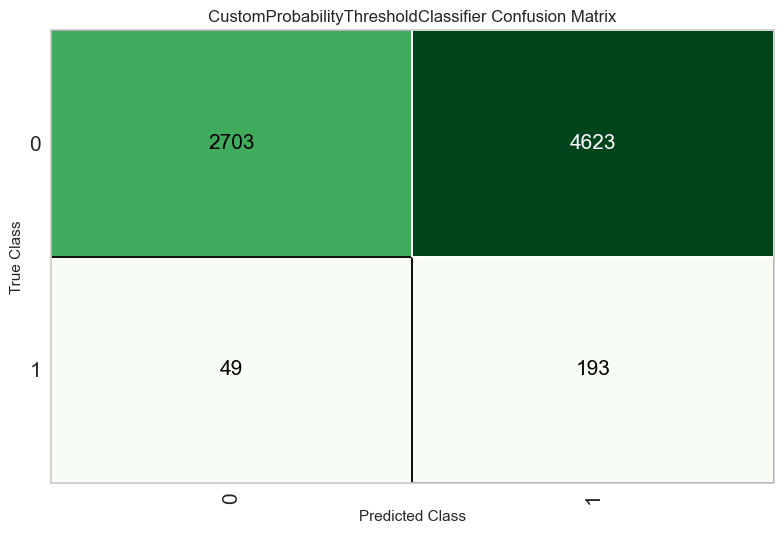

In [30]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [31]:
print(tuned_rf)

CustomProbabilityThresholdClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight='balanced',
                                     classifier=RandomForestClassifier(bootstrap=True,
                                                                       ccp_alpha=0.0,
                                                                       class_weight='balanced',
                                                                       criterion='entropy',
                                                                       max_depth=3,
                                                                       max_features='log2',
                                                                       max_leaf_nodes=None,
                                                                       max_samples=None,
                                                                       min_impurity_decrease=0,
                                                        

In [32]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Nov  6 10:06:52 2018

@author: yandexdataschool

Original Code found in:
https://github.com/yandexdataschool/roc_comparison

updated: Raul Sanchez-Vazquez
"""
'The de long solution '

import numpy as np
import scipy.stats
from scipy import stats

# AUC comparison adapted from
# https://github.com/Netflix/vmaf/
def compute_midrank(x):
    """Computes midranks.
    Args:
       x - a 1D numpy array
    Returns:
       array of midranks
    """
    J = np.argsort(x)
    Z = x[J]
    N = len(x)
    T = np.zeros(N, dtype=float)
    i = 0
    while i < N:
        j = i
        while j < N and Z[j] == Z[i]:
            j += 1
        T[i:j] = 0.5*(i + j - 1)
        i = j
    T2 = np.empty(N, dtype=float)
    # Note(kazeevn) +1 is due to Python using 0-based indexing
    # instead of 1-based in the AUC formula in the paper
    T2[J] = T + 1
    return T2


def compute_midrank_weight(x, sample_weight):
    """Computes midranks.
    Args:
       x - a 1D numpy array
    Returns:
       array of midranks
    """
    J = np.argsort(x)
    Z = x[J]
    cumulative_weight = np.cumsum(sample_weight[J])
    N = len(x)
    T = np.zeros(N, dtype=float)
    i = 0
    while i < N:
        j = i
        while j < N and Z[j] == Z[i]:
            j += 1
        T[i:j] = cumulative_weight[i:j].mean()
        i = j
    T2 = np.empty(N, dtype=float)
    T2[J] = T
    return T2


def fastDeLong(predictions_sorted_transposed, label_1_count, sample_weight):
    if sample_weight is None:
        return fastDeLong_no_weights(predictions_sorted_transposed, label_1_count)
    else:
        return fastDeLong_weights(predictions_sorted_transposed, label_1_count, sample_weight)


def fastDeLong_weights(predictions_sorted_transposed, label_1_count, sample_weight):
    """
    The fast version of DeLong's method for computing the covariance of
    unadjusted AUC.
    Args:
       predictions_sorted_transposed: a 2D numpy.array[n_classifiers, n_examples]
          sorted such as the examples with label "1" are first
    Returns:
       (AUC value, DeLong covariance)
    Reference:
     @article{sun2014fast,
       title={Fast Implementation of DeLong's Algorithm for
              Comparing the Areas Under Correlated Receiver Oerating Characteristic Curves},
       author={Xu Sun and Weichao Xu},
       journal={IEEE Signal Processing Letters},
       volume={21},
       number={11},
       pages={1389--1393},
       year={2014},
       publisher={IEEE}
     }
    """
    # Short variables are named as they are in the paper
    m = label_1_count
    n = predictions_sorted_transposed.shape[1] - m
    positive_examples = predictions_sorted_transposed[:, :m]
    negative_examples = predictions_sorted_transposed[:, m:]
    k = predictions_sorted_transposed.shape[0]

    tx = np.empty([k, m], dtype=float)
    ty = np.empty([k, n], dtype=float)
    tz = np.empty([k, m + n], dtype=float)
    for r in range(k):
        tx[r, :] = compute_midrank_weight(positive_examples[r, :], sample_weight[:m])
        ty[r, :] = compute_midrank_weight(negative_examples[r, :], sample_weight[m:])
        tz[r, :] = compute_midrank_weight(predictions_sorted_transposed[r, :], sample_weight)
    total_positive_weights = sample_weight[:m].sum()
    total_negative_weights = sample_weight[m:].sum()
    pair_weights = np.dot(sample_weight[:m, np.newaxis], sample_weight[np.newaxis, m:])
    total_pair_weights = pair_weights.sum()
    aucs = (sample_weight[:m]*(tz[:, :m] - tx)).sum(axis=1) / total_pair_weights
    v01 = (tz[:, :m] - tx[:, :]) / total_negative_weights
    v10 = 1. - (tz[:, m:] - ty[:, :]) / total_positive_weights
    sx = np.cov(v01)
    sy = np.cov(v10)
    delongcov = sx / m + sy / n
    return aucs, delongcov


def fastDeLong_no_weights(predictions_sorted_transposed, label_1_count):
    """
    The fast version of DeLong's method for computing the covariance of
    unadjusted AUC.
    Args:
       predictions_sorted_transposed: a 2D numpy.array[n_classifiers, n_examples]
          sorted such as the examples with label "1" are first
    Returns:
       (AUC value, DeLong covariance)
    Reference:
     @article{sun2014fast,
       title={Fast Implementation of DeLong's Algorithm for
              Comparing the Areas Under Correlated Receiver Oerating
              Characteristic Curves},
       author={Xu Sun and Weichao Xu},
       journal={IEEE Signal Processing Letters},
       volume={21},
       number={11},
       pages={1389--1393},
       year={2014},
       publisher={IEEE}
     }
    """
    # Short variables are named as they are in the paper
    m = label_1_count
    n = predictions_sorted_transposed.shape[1] - m
    positive_examples = predictions_sorted_transposed[:, :m]
    negative_examples = predictions_sorted_transposed[:, m:]
    k = predictions_sorted_transposed.shape[0]

    tx = np.empty([k, m], dtype=float)
    ty = np.empty([k, n], dtype=float)
    tz = np.empty([k, m + n], dtype=float)
    for r in range(k):
        tx[r, :] = compute_midrank(positive_examples[r, :])
        ty[r, :] = compute_midrank(negative_examples[r, :])
        tz[r, :] = compute_midrank(predictions_sorted_transposed[r, :])
    aucs = tz[:, :m].sum(axis=1) / m / n - float(m + 1.0) / 2.0 / n
    v01 = (tz[:, :m] - tx[:, :]) / n
    v10 = 1.0 - (tz[:, m:] - ty[:, :]) / m
    sx = np.cov(v01)
    sy = np.cov(v10)
    delongcov = sx / m + sy / n
    return aucs, delongcov


def calc_pvalue(aucs, sigma):
    """Computes log(10) of p-values.
    Args:
       aucs: 1D array of AUCs
       sigma: AUC DeLong covariances
    Returns:
       log10(pvalue)
    """
    l = np.array([[1, -1]])
    z = np.abs(np.diff(aucs)) / np.sqrt(np.dot(np.dot(l, sigma), l.T))
    return np.log10(2) + scipy.stats.norm.logsf(z, loc=0, scale=1) / np.log(10)


def compute_ground_truth_statistics(ground_truth, sample_weight):
    assert np.array_equal(np.unique(ground_truth), [0, 1])
    order = (-ground_truth).argsort()
    label_1_count = int(ground_truth.sum())
    if sample_weight is None:
        ordered_sample_weight = None
    else:
        ordered_sample_weight = sample_weight[order]

    return order, label_1_count, ordered_sample_weight


def delong_roc_variance(ground_truth, predictions, sample_weight=None):
    """
    Computes ROC AUC variance for a single set of predictions
    Args:
       ground_truth: np.array of 0 and 1
       predictions: np.array of floats of the probability of being class 1
    """
    order, label_1_count, ordered_sample_weight = compute_ground_truth_statistics(
        ground_truth, sample_weight)
    predictions_sorted_transposed = predictions[np.newaxis, order]
    aucs, delongcov = fastDeLong(predictions_sorted_transposed, label_1_count, ordered_sample_weight)
    assert len(aucs) == 1, "There is a bug in the code, please forward this to the developers"
    return aucs[0], delongcov

df_rf['Tamponade'].values, df_rf['prediction_score_1'].values
alpha = .95
y_pred = df_rf['prediction_score_1'].values
y_true = df_rf['Tamponade'].values

auc, auc_cov = delong_roc_variance(
    y_true,
    y_pred)

auc_std = np.sqrt(auc_cov)
lower_upper_q = np.abs(np.array([0, 1]) - (1 - alpha) / 2)

ci = stats.norm.ppf(
    lower_upper_q,
    loc=auc,
    scale=auc_std)

ci[ci > 1] = 1

print('AUC:', auc)
print('AUC COV:', auc_cov)
print('95% AUC CI:', ci)



AUC: 0.6073294368748915
AUC COV: 0.0003034862138710819
95% AUC CI: [0.57318519 0.64147369]


In [10]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
Fold,,,,,,,,
0,0.2350,0.5685,0.8571,0.0345,0.0663,0.0057,0.0307,0.2146
1,0.2463,0.6123,0.8772,0.0364,0.0699,0.0084,0.0436,0.2253
2,0.2673,0.5260,0.8070,0.0346,0.0664,0.0048,0.0231,0.2493
3,0.2814,0.6417,0.8947,0.0388,0.0744,0.0134,0.0631,0.2610
4,0.2214,0.5808,0.8947,0.0359,0.0691,0.0075,0.0417,0.1989
5,0.2752,0.5873,0.7719,0.0336,0.0643,0.0026,0.0123,0.2586
6,0.2980,0.5735,0.8393,0.0368,0.0705,0.0104,0.0469,0.2803
7,0.2589,0.5919,0.9107,0.0377,0.0723,0.0121,0.0615,0.2376
8,0.2680,0.6307,0.8750,0.0367,0.0705,0.0102,0.0502,0.2481


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [11]:
tuned_nb = tune_model(nb, n_iter=150, optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
Fold,,,,,,,,
0,0.1687,0.5809,0.8929,0.0331,0.0638,0.0028,0.0189,0.1450
1,0.1642,0.6299,0.9298,0.0348,0.0670,0.0051,0.0353,0.1387
2,0.1699,0.5535,0.9123,0.0344,0.0662,0.0043,0.0290,0.1451
3,0.2152,0.6542,0.9298,0.0369,0.0710,0.0096,0.0549,0.1913
4,0.1586,0.6021,0.9298,0.0345,0.0666,0.0046,0.0328,0.1328
5,0.1988,0.6044,0.9825,0.0381,0.0733,0.0119,0.0734,0.1726
6,0.1892,0.5819,0.9107,0.0345,0.0665,0.0057,0.0362,0.1656
7,0.1830,0.6105,0.9464,0.0355,0.0685,0.0078,0.0506,0.1580
8,0.1841,0.6255,0.9107,0.0343,0.0661,0.0053,0.0341,0.1603


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 28 candidates, totalling 280 fits


In [12]:
deep_check(tuned_nb)

deepchecks - WARNING - You are using deepchecks version 0.17.3, however a newer version is available. Deepchecks is frequently updated with major improvements. You should consider upgrading via the "python -m pip install --upgrade deepchecks" command.


deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 13 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_NZJ79DC9VG5GI3KR56XOZAWT5">Full Suite</h1>\n<…

In [13]:
nb = create_model('nb',probability_threshold=0.689)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
Fold,,,,,,,,
0,0.3754,0.5685,0.6786,0.0338,0.0645,0.0043,0.0160,0.3655
1,0.3681,0.6123,0.7544,0.0376,0.0715,0.0107,0.0406,0.3552
2,0.3596,0.5260,0.6491,0.0322,0.0614,-0.0001,-0.0004,0.3499
3,0.4524,0.6417,0.7544,0.0432,0.0817,0.0220,0.0701,0.4424
4,0.3601,0.5908,0.7368,0.0363,0.0692,0.0082,0.0314,0.3476
5,0.4287,0.5946,0.7018,0.0388,0.0735,0.0131,0.0435,0.4195
6,0.4283,0.5769,0.6964,0.0378,0.0718,0.0123,0.0412,0.4195
7,0.4232,0.5970,0.7143,0.0384,0.0729,0.0134,0.0456,0.4137
8,0.4108,0.6129,0.7321,0.0385,0.0731,0.0136,0.0474,0.4002


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [14]:
tuned_nb = tune_model(nb, n_iter=150, optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
Fold,,,,,,,,
0,0.4009,0.5809,0.7321,0.0378,0.0719,0.0124,0.0440,0.3901
1,0.3834,0.6299,0.7544,0.0385,0.0732,0.0125,0.0460,0.3710
2,0.3817,0.5535,0.6842,0.0350,0.0667,0.0056,0.0204,0.3716
3,0.4694,0.6542,0.7368,0.0436,0.0823,0.0227,0.0701,0.4605
4,0.3771,0.6021,0.7719,0.0389,0.0741,0.0134,0.0500,0.3640
5,0.4320,0.6044,0.6842,0.0381,0.0722,0.0117,0.0386,0.4236
6,0.4419,0.5805,0.6964,0.0387,0.0734,0.0141,0.0460,0.4336
7,0.4476,0.6105,0.7143,0.0400,0.0758,0.0167,0.0542,0.4389
8,0.4538,0.6138,0.7679,0.0433,0.0819,0.0232,0.0747,0.4435


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 28 candidates, totalling 280 fits


In [15]:
df_nb=predict_model(tuned_nb, raw_score=True)
false_positive_rate_nb, true_positive_rate_nb, threshold_nb = roc_curve(df_nb['Tamponade'].values,df_nb['prediction_score_1'].values)
auc_nb = round(metrics.roc_auc_score(df_nb['Tamponade'].values, df_nb['prediction_score_1'].values), 4) 
df_nb.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
0,Naive Bayes,0.4210,0.6013,0.7562,0.0406,0.0771,0.0175,0.0595,0.4099


,Gender,Diabetes,Positive family history,Dyslipidemia,Current cigarette smoking,Current opium consumption,Hx of Angioplasty POBA,Hx of renal failure,MI <24h,1d < MI < 7d,...,Age,Hgb,Cr,Urgent/emergent surgery,Off-pump surgery,Cabg+valve surgery,Tamponade,prediction_label,prediction_score_0,prediction_score_1
17661,1,0,1,1,0,0,0,0,0,0,...,56,14.80,0.81,0,0,0,0,0,0.3201,0.6799
55,1,1,0,1,0,0,0,0,0,0,...,76,10.42,0.91,0,0,1,0,1,0.1031,0.8969
2561,1,1,0,1,0,0,0,0,0,0,...,78,10.70,0.80,1,0,0,0,1,0.2548,0.7452
12670,1,1,0,0,0,0,0,0,0,0,...,58,15.00,1.20,0,0,1,0,1,0.0884,0.9116
1085,1,1,0,1,0,0,0,0,0,0,...,61,12.10,1.04,0,1,0,0,0,0.9745,0.0255


In [16]:
save_model(tuned_nb, model_name = 'nb')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\A3F28~1.VAK\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Gender', 'Diabetes',
                                              'Positive family history',
                                              'Dyslipidemia',
                                              'Current cigarette smoking',
                                              'Current opium consumption',
                                              'Hx of Angioplasty POBA',
                                              'Hx of renal failure', 'MI <24h',
                                              '1d < MI < 7d',
                                              'Previous antiplatelet use'...
                                     transformer=StandardScaler(copy=True,
                                                                with_mean=True,
                         

In [ ]:
print(lo_nb)

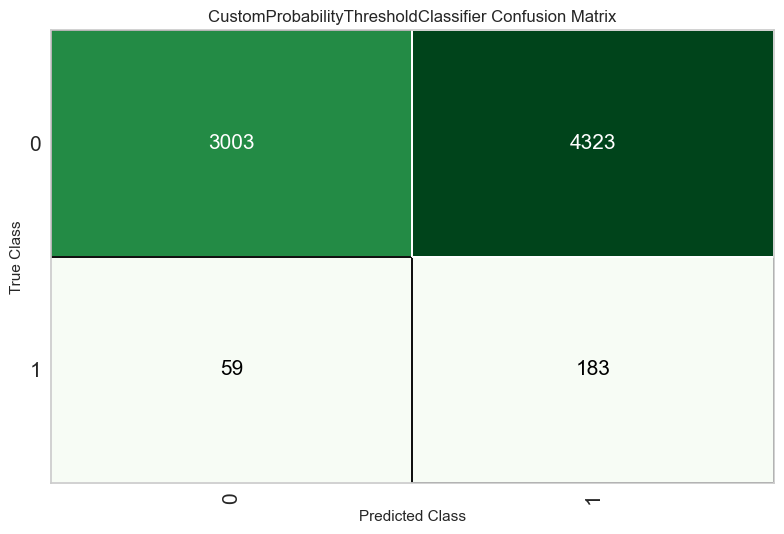

In [17]:
plot_model(tuned_nb, plot = 'confusion_matrix')

In [18]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Nov  6 10:06:52 2018

@author: yandexdataschool

Original Code found in:
https://github.com/yandexdataschool/roc_comparison

updated: Raul Sanchez-Vazquez
"""
'The de long solution '

import numpy as np
import scipy.stats
from scipy import stats

# AUC comparison adapted from
# https://github.com/Netflix/vmaf/
def compute_midrank(x):
    """Computes midranks.
    Args:
       x - a 1D numpy array
    Returns:
       array of midranks
    """
    J = np.argsort(x)
    Z = x[J]
    N = len(x)
    T = np.zeros(N, dtype=float)
    i = 0
    while i < N:
        j = i
        while j < N and Z[j] == Z[i]:
            j += 1
        T[i:j] = 0.5*(i + j - 1)
        i = j
    T2 = np.empty(N, dtype=float)
    # Note(kazeevn) +1 is due to Python using 0-based indexing
    # instead of 1-based in the AUC formula in the paper
    T2[J] = T + 1
    return T2


def compute_midrank_weight(x, sample_weight):
    """Computes midranks.
    Args:
       x - a 1D numpy array
    Returns:
       array of midranks
    """
    J = np.argsort(x)
    Z = x[J]
    cumulative_weight = np.cumsum(sample_weight[J])
    N = len(x)
    T = np.zeros(N, dtype=float)
    i = 0
    while i < N:
        j = i
        while j < N and Z[j] == Z[i]:
            j += 1
        T[i:j] = cumulative_weight[i:j].mean()
        i = j
    T2 = np.empty(N, dtype=float)
    T2[J] = T
    return T2


def fastDeLong(predictions_sorted_transposed, label_1_count, sample_weight):
    if sample_weight is None:
        return fastDeLong_no_weights(predictions_sorted_transposed, label_1_count)
    else:
        return fastDeLong_weights(predictions_sorted_transposed, label_1_count, sample_weight)


def fastDeLong_weights(predictions_sorted_transposed, label_1_count, sample_weight):
    """
    The fast version of DeLong's method for computing the covariance of
    unadjusted AUC.
    Args:
       predictions_sorted_transposed: a 2D numpy.array[n_classifiers, n_examples]
          sorted such as the examples with label "1" are first
    Returns:
       (AUC value, DeLong covariance)
    Reference:
     @article{sun2014fast,
       title={Fast Implementation of DeLong's Algorithm for
              Comparing the Areas Under Correlated Receiver Oerating Characteristic Curves},
       author={Xu Sun and Weichao Xu},
       journal={IEEE Signal Processing Letters},
       volume={21},
       number={11},
       pages={1389--1393},
       year={2014},
       publisher={IEEE}
     }
    """
    # Short variables are named as they are in the paper
    m = label_1_count
    n = predictions_sorted_transposed.shape[1] - m
    positive_examples = predictions_sorted_transposed[:, :m]
    negative_examples = predictions_sorted_transposed[:, m:]
    k = predictions_sorted_transposed.shape[0]

    tx = np.empty([k, m], dtype=float)
    ty = np.empty([k, n], dtype=float)
    tz = np.empty([k, m + n], dtype=float)
    for r in range(k):
        tx[r, :] = compute_midrank_weight(positive_examples[r, :], sample_weight[:m])
        ty[r, :] = compute_midrank_weight(negative_examples[r, :], sample_weight[m:])
        tz[r, :] = compute_midrank_weight(predictions_sorted_transposed[r, :], sample_weight)
    total_positive_weights = sample_weight[:m].sum()
    total_negative_weights = sample_weight[m:].sum()
    pair_weights = np.dot(sample_weight[:m, np.newaxis], sample_weight[np.newaxis, m:])
    total_pair_weights = pair_weights.sum()
    aucs = (sample_weight[:m]*(tz[:, :m] - tx)).sum(axis=1) / total_pair_weights
    v01 = (tz[:, :m] - tx[:, :]) / total_negative_weights
    v10 = 1. - (tz[:, m:] - ty[:, :]) / total_positive_weights
    sx = np.cov(v01)
    sy = np.cov(v10)
    delongcov = sx / m + sy / n
    return aucs, delongcov


def fastDeLong_no_weights(predictions_sorted_transposed, label_1_count):
    """
    The fast version of DeLong's method for computing the covariance of
    unadjusted AUC.
    Args:
       predictions_sorted_transposed: a 2D numpy.array[n_classifiers, n_examples]
          sorted such as the examples with label "1" are first
    Returns:
       (AUC value, DeLong covariance)
    Reference:
     @article{sun2014fast,
       title={Fast Implementation of DeLong's Algorithm for
              Comparing the Areas Under Correlated Receiver Oerating
              Characteristic Curves},
       author={Xu Sun and Weichao Xu},
       journal={IEEE Signal Processing Letters},
       volume={21},
       number={11},
       pages={1389--1393},
       year={2014},
       publisher={IEEE}
     }
    """
    # Short variables are named as they are in the paper
    m = label_1_count
    n = predictions_sorted_transposed.shape[1] - m
    positive_examples = predictions_sorted_transposed[:, :m]
    negative_examples = predictions_sorted_transposed[:, m:]
    k = predictions_sorted_transposed.shape[0]

    tx = np.empty([k, m], dtype=float)
    ty = np.empty([k, n], dtype=float)
    tz = np.empty([k, m + n], dtype=float)
    for r in range(k):
        tx[r, :] = compute_midrank(positive_examples[r, :])
        ty[r, :] = compute_midrank(negative_examples[r, :])
        tz[r, :] = compute_midrank(predictions_sorted_transposed[r, :])
    aucs = tz[:, :m].sum(axis=1) / m / n - float(m + 1.0) / 2.0 / n
    v01 = (tz[:, :m] - tx[:, :]) / n
    v10 = 1.0 - (tz[:, m:] - ty[:, :]) / m
    sx = np.cov(v01)
    sy = np.cov(v10)
    delongcov = sx / m + sy / n
    return aucs, delongcov


def calc_pvalue(aucs, sigma):
    """Computes log(10) of p-values.
    Args:
       aucs: 1D array of AUCs
       sigma: AUC DeLong covariances
    Returns:
       log10(pvalue)
    """
    l = np.array([[1, -1]])
    z = np.abs(np.diff(aucs)) / np.sqrt(np.dot(np.dot(l, sigma), l.T))
    return np.log10(2) + scipy.stats.norm.logsf(z, loc=0, scale=1) / np.log(10)


def compute_ground_truth_statistics(ground_truth, sample_weight):
    assert np.array_equal(np.unique(ground_truth), [0, 1])
    order = (-ground_truth).argsort()
    label_1_count = int(ground_truth.sum())
    if sample_weight is None:
        ordered_sample_weight = None
    else:
        ordered_sample_weight = sample_weight[order]

    return order, label_1_count, ordered_sample_weight


def delong_roc_variance(ground_truth, predictions, sample_weight=None):
    """
    Computes ROC AUC variance for a single set of predictions
    Args:
       ground_truth: np.array of 0 and 1
       predictions: np.array of floats of the probability of being class 1
    """
    order, label_1_count, ordered_sample_weight = compute_ground_truth_statistics(
        ground_truth, sample_weight)
    predictions_sorted_transposed = predictions[np.newaxis, order]
    aucs, delongcov = fastDeLong(predictions_sorted_transposed, label_1_count, ordered_sample_weight)
    assert len(aucs) == 1, "There is a bug in the code, please forward this to the developers"
    return aucs[0], delongcov

df_nb['Tamponade'].values, df_nb['prediction_score_1'].values
alpha = .95
y_pred = df_nb['prediction_score_1'].values
y_true = df_nb['Tamponade'].values

auc, auc_cov = delong_roc_variance(
    y_true,
    y_pred)

auc_std = np.sqrt(auc_cov)
lower_upper_q = np.abs(np.array([0, 1]) - (1 - alpha) / 2)

ci = stats.norm.ppf(
    lower_upper_q,
    loc=auc,
    scale=auc_std)

ci[ci > 1] = 1

print('AUC:', auc)
print('AUC COV:', auc_cov)
print('95% AUC CI:', ci)


AUC: 0.6012424896722417
AUC COV: 0.0003432015021993392
95% AUC CI: [0.56493279 0.63755219]


In [19]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
Fold,,,,,,,,
0,0.9626,0.6045,0.0357,0.1429,0.0571,0.0450,0.0567,0.9930
1,0.9490,0.5909,0.0877,0.1163,0.1000,0.0743,0.0751,0.9778
2,0.9677,0.5730,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
3,0.9547,0.5819,0.0526,0.1034,0.0698,0.0491,0.0520,0.9848
4,0.9558,0.5663,0.0351,0.0800,0.0488,0.0297,0.0324,0.9865
5,0.9496,0.5662,0.0702,0.1000,0.0825,0.0574,0.0583,0.9789
6,0.9484,0.4935,0.0000,0.0000,0.0000,-0.0250,-0.0257,0.9795
7,0.9530,0.5800,0.0179,0.0345,0.0235,0.0019,0.0020,0.9836
8,0.9467,0.6210,0.0893,0.1042,0.0962,0.0689,0.0691,0.9748


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [20]:
tuned_ada = tune_model(ada, n_iter=150, optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
Fold,,,,,,,,
0,0.6965,0.6266,0.4643,0.0489,0.0884,0.0329,0.0643,0.7041
1,0.6036,0.6748,0.6316,0.0503,0.0933,0.0356,0.0843,0.6027
2,0.5776,0.6604,0.6667,0.0497,0.0925,0.0345,0.0861,0.5746
3,0.5243,0.6071,0.6316,0.0421,0.0789,0.0196,0.0539,0.5208
4,0.5391,0.5891,0.5439,0.0379,0.0708,0.0111,0.0293,0.5389
5,0.6857,0.5825,0.3509,0.0372,0.0672,0.0094,0.0183,0.6969
6,0.5620,0.5453,0.4643,0.0338,0.0630,0.0041,0.0104,0.5652
7,0.6657,0.6154,0.5179,0.0490,0.0895,0.0335,0.0700,0.6706
8,0.6856,0.6353,0.4464,0.0455,0.0826,0.0266,0.0529,0.6934


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


In [21]:
deep_check(tuned_ada)

deepchecks - WARNING - You are using deepchecks version 0.17.3, however a newer version is available. Deepchecks is frequently updated with major improvements. You should consider upgrading via the "python -m pip install --upgrade deepchecks" command.


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_NIZDB2A7Z2D57146JHKV7A04T">Full Suite</h1>\n<…

In [22]:
ada = create_model('ada',probability_threshold=0.46)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
Fold,,,,,,,,
0,0.0317,0.6193,1.0000,0.0317,0.0615,0.0000,0.0000,0.0000
1,0.0323,0.6210,1.0000,0.0323,0.0625,0.0000,0.0000,0.0000
2,0.0323,0.5765,1.0000,0.0323,0.0625,0.0000,0.0000,0.0000
3,0.0323,0.6002,1.0000,0.0323,0.0625,0.0000,0.0000,0.0000
4,0.0323,0.5392,1.0000,0.0323,0.0625,0.0000,0.0000,0.0000
5,0.0323,0.5793,1.0000,0.0323,0.0625,0.0000,0.0000,0.0000
6,0.0317,0.5174,1.0000,0.0317,0.0615,0.0000,0.0000,0.0000
7,0.0317,0.5656,1.0000,0.0317,0.0615,0.0000,0.0000,0.0000
8,0.0317,0.6228,1.0000,0.0317,0.0615,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [23]:
tuned_ada = tune_model(ada, n_iter=150, optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
Fold,,,,,,,,
0,0.3550,0.6169,0.8036,0.0384,0.0732,0.0135,0.0534,0.3404
1,0.3262,0.6882,0.8772,0.0406,0.0775,0.0169,0.0712,0.3078
2,0.3443,0.6491,0.8947,0.0424,0.0810,0.0206,0.0837,0.3259
3,0.3545,0.6202,0.8246,0.0399,0.0762,0.0156,0.0612,0.3388
4,0.3018,0.5962,0.8596,0.0385,0.0736,0.0126,0.0563,0.2832
5,0.3369,0.5734,0.7719,0.0366,0.0699,0.0088,0.0358,0.3224
6,0.3275,0.5363,0.7321,0.0338,0.0646,0.0042,0.0175,0.3142
7,0.2878,0.6328,0.8393,0.0363,0.0696,0.0093,0.0432,0.2697
8,0.3558,0.6369,0.8214,0.0392,0.0749,0.0152,0.0601,0.3406


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


In [24]:
df_ada=predict_model(tuned_ada, raw_score=True)
false_positive_rate_ada, true_positive_rate_ada, threshold_ada = roc_curve(df_ada['Tamponade'].values, df_ada['prediction_score_1'].values)
auc_ada = round(metrics.roc_auc_score(df_ada['Tamponade'].values, df_ada['prediction_score_1'].values), 4) 
df_ada.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
0,Ada Boost Classifier,0.2932,0.6148,0.8884,0.0388,0.0744,0.0140,0.0643,0.2735


,Gender,Diabetes,Positive family history,Dyslipidemia,Current cigarette smoking,Current opium consumption,Hx of Angioplasty POBA,Hx of renal failure,MI <24h,1d < MI < 7d,...,Age,Hgb,Cr,Urgent/emergent surgery,Off-pump surgery,Cabg+valve surgery,Tamponade,prediction_label,prediction_score_0,prediction_score_1
17661,1,0,1,1,0,0,0,0,0,0,...,56,14.80,0.81,0,0,0,0,1,0.5153,0.4847
55,1,1,0,1,0,0,0,0,0,0,...,76,10.42,0.91,0,0,1,0,1,0.4503,0.5497
2561,1,1,0,1,0,0,0,0,0,0,...,78,10.70,0.80,1,0,0,0,1,0.5155,0.4845
12670,1,1,0,0,0,0,0,0,0,0,...,58,15.00,1.20,0,0,1,0,1,0.4292,0.5708
1085,1,1,0,1,0,0,0,0,0,0,...,61,12.10,1.04,0,1,0,0,0,0.5843,0.4157


In [25]:
save_model(tuned_ada, model_name = 'ada')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\A3F28~1.VAK\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Gender', 'Diabetes',
                                              'Positive family history',
                                              'Dyslipidemia',
                                              'Current cigarette smoking',
                                              'Current opium consumption',
                                              'Hx of Angioplasty POBA',
                                              'Hx of renal failure', 'MI <24h',
                                              '1d < MI < 7d',
                                              'Previous antiplatelet use'...
                 ('trained_model',
                  CustomProbabilityThresholdClassifier(algorithm='SAMME',
                                                       base_estimator='

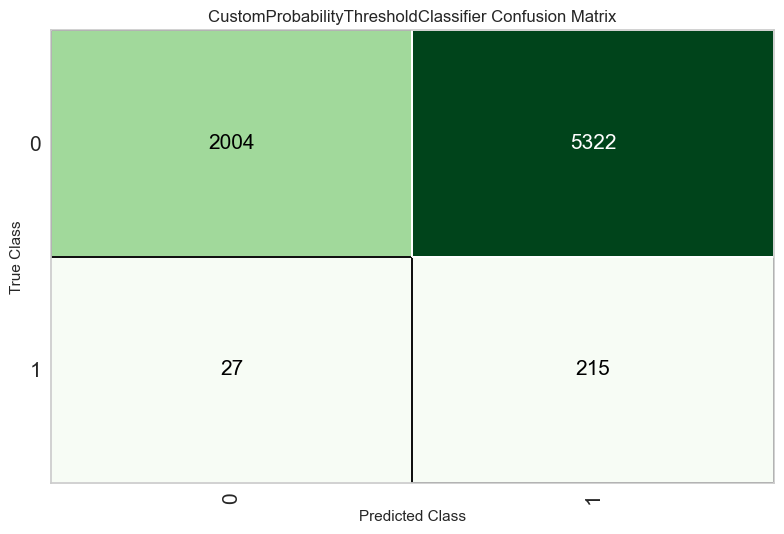

In [26]:
plot_model(tuned_ada, plot = 'confusion_matrix')

In [27]:
print(tuned_ada)

CustomProbabilityThresholdClassifier(algorithm='SAMME',
                                     base_estimator='deprecated',
                                     classifier=AdaBoostClassifier(algorithm='SAMME',
                                                                   base_estimator='deprecated',
                                                                   estimator=None,
                                                                   learning_rate=0.4,
                                                                   n_estimators=50,
                                                                   random_state=123),
                                     estimator=None, learning_rate=0.4,
                                     n_estimators=50,
                                     probability_threshold=0.46,
                                     random_state=123)


In [28]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Nov  6 10:06:52 2018

@author: yandexdataschool

Original Code found in:
https://github.com/yandexdataschool/roc_comparison

updated: Raul Sanchez-Vazquez
"""
'The de long solution '

import numpy as np
import scipy.stats
from scipy import stats

# AUC comparison adapted from
# https://github.com/Netflix/vmaf/
def compute_midrank(x):
    """Computes midranks.
    Args:
       x - a 1D numpy array
    Returns:
       array of midranks
    """
    J = np.argsort(x)
    Z = x[J]
    N = len(x)
    T = np.zeros(N, dtype=float)
    i = 0
    while i < N:
        j = i
        while j < N and Z[j] == Z[i]:
            j += 1
        T[i:j] = 0.5*(i + j - 1)
        i = j
    T2 = np.empty(N, dtype=float)
    # Note(kazeevn) +1 is due to Python using 0-based indexing
    # instead of 1-based in the AUC formula in the paper
    T2[J] = T + 1
    return T2


def compute_midrank_weight(x, sample_weight):
    """Computes midranks.
    Args:
       x - a 1D numpy array
    Returns:
       array of midranks
    """
    J = np.argsort(x)
    Z = x[J]
    cumulative_weight = np.cumsum(sample_weight[J])
    N = len(x)
    T = np.zeros(N, dtype=float)
    i = 0
    while i < N:
        j = i
        while j < N and Z[j] == Z[i]:
            j += 1
        T[i:j] = cumulative_weight[i:j].mean()
        i = j
    T2 = np.empty(N, dtype=float)
    T2[J] = T
    return T2


def fastDeLong(predictions_sorted_transposed, label_1_count, sample_weight):
    if sample_weight is None:
        return fastDeLong_no_weights(predictions_sorted_transposed, label_1_count)
    else:
        return fastDeLong_weights(predictions_sorted_transposed, label_1_count, sample_weight)


def fastDeLong_weights(predictions_sorted_transposed, label_1_count, sample_weight):
    """
    The fast version of DeLong's method for computing the covariance of
    unadjusted AUC.
    Args:
       predictions_sorted_transposed: a 2D numpy.array[n_classifiers, n_examples]
          sorted such as the examples with label "1" are first
    Returns:
       (AUC value, DeLong covariance)
    Reference:
     @article{sun2014fast,
       title={Fast Implementation of DeLong's Algorithm for
              Comparing the Areas Under Correlated Receiver Oerating Characteristic Curves},
       author={Xu Sun and Weichao Xu},
       journal={IEEE Signal Processing Letters},
       volume={21},
       number={11},
       pages={1389--1393},
       year={2014},
       publisher={IEEE}
     }
    """
    # Short variables are named as they are in the paper
    m = label_1_count
    n = predictions_sorted_transposed.shape[1] - m
    positive_examples = predictions_sorted_transposed[:, :m]
    negative_examples = predictions_sorted_transposed[:, m:]
    k = predictions_sorted_transposed.shape[0]

    tx = np.empty([k, m], dtype=float)
    ty = np.empty([k, n], dtype=float)
    tz = np.empty([k, m + n], dtype=float)
    for r in range(k):
        tx[r, :] = compute_midrank_weight(positive_examples[r, :], sample_weight[:m])
        ty[r, :] = compute_midrank_weight(negative_examples[r, :], sample_weight[m:])
        tz[r, :] = compute_midrank_weight(predictions_sorted_transposed[r, :], sample_weight)
    total_positive_weights = sample_weight[:m].sum()
    total_negative_weights = sample_weight[m:].sum()
    pair_weights = np.dot(sample_weight[:m, np.newaxis], sample_weight[np.newaxis, m:])
    total_pair_weights = pair_weights.sum()
    aucs = (sample_weight[:m]*(tz[:, :m] - tx)).sum(axis=1) / total_pair_weights
    v01 = (tz[:, :m] - tx[:, :]) / total_negative_weights
    v10 = 1. - (tz[:, m:] - ty[:, :]) / total_positive_weights
    sx = np.cov(v01)
    sy = np.cov(v10)
    delongcov = sx / m + sy / n
    return aucs, delongcov


def fastDeLong_no_weights(predictions_sorted_transposed, label_1_count):
    """
    The fast version of DeLong's method for computing the covariance of
    unadjusted AUC.
    Args:
       predictions_sorted_transposed: a 2D numpy.array[n_classifiers, n_examples]
          sorted such as the examples with label "1" are first
    Returns:
       (AUC value, DeLong covariance)
    Reference:
     @article{sun2014fast,
       title={Fast Implementation of DeLong's Algorithm for
              Comparing the Areas Under Correlated Receiver Oerating
              Characteristic Curves},
       author={Xu Sun and Weichao Xu},
       journal={IEEE Signal Processing Letters},
       volume={21},
       number={11},
       pages={1389--1393},
       year={2014},
       publisher={IEEE}
     }
    """
    # Short variables are named as they are in the paper
    m = label_1_count
    n = predictions_sorted_transposed.shape[1] - m
    positive_examples = predictions_sorted_transposed[:, :m]
    negative_examples = predictions_sorted_transposed[:, m:]
    k = predictions_sorted_transposed.shape[0]

    tx = np.empty([k, m], dtype=float)
    ty = np.empty([k, n], dtype=float)
    tz = np.empty([k, m + n], dtype=float)
    for r in range(k):
        tx[r, :] = compute_midrank(positive_examples[r, :])
        ty[r, :] = compute_midrank(negative_examples[r, :])
        tz[r, :] = compute_midrank(predictions_sorted_transposed[r, :])
    aucs = tz[:, :m].sum(axis=1) / m / n - float(m + 1.0) / 2.0 / n
    v01 = (tz[:, :m] - tx[:, :]) / n
    v10 = 1.0 - (tz[:, m:] - ty[:, :]) / m
    sx = np.cov(v01)
    sy = np.cov(v10)
    delongcov = sx / m + sy / n
    return aucs, delongcov


def calc_pvalue(aucs, sigma):
    """Computes log(10) of p-values.
    Args:
       aucs: 1D array of AUCs
       sigma: AUC DeLong covariances
    Returns:
       log10(pvalue)
    """
    l = np.array([[1, -1]])
    z = np.abs(np.diff(aucs)) / np.sqrt(np.dot(np.dot(l, sigma), l.T))
    return np.log10(2) + scipy.stats.norm.logsf(z, loc=0, scale=1) / np.log(10)


def compute_ground_truth_statistics(ground_truth, sample_weight):
    assert np.array_equal(np.unique(ground_truth), [0, 1])
    order = (-ground_truth).argsort()
    label_1_count = int(ground_truth.sum())
    if sample_weight is None:
        ordered_sample_weight = None
    else:
        ordered_sample_weight = sample_weight[order]

    return order, label_1_count, ordered_sample_weight


def delong_roc_variance(ground_truth, predictions, sample_weight=None):
    """
    Computes ROC AUC variance for a single set of predictions
    Args:
       ground_truth: np.array of 0 and 1
       predictions: np.array of floats of the probability of being class 1
    """
    order, label_1_count, ordered_sample_weight = compute_ground_truth_statistics(
        ground_truth, sample_weight)
    predictions_sorted_transposed = predictions[np.newaxis, order]
    aucs, delongcov = fastDeLong(predictions_sorted_transposed, label_1_count, ordered_sample_weight)
    assert len(aucs) == 1, "There is a bug in the code, please forward this to the developers"
    return aucs[0], delongcov

df_ada['Tamponade'].values, df_ada['prediction_score_1'].values
alpha = .95
y_pred = df_ada['prediction_score_1'].values
y_true = df_ada['Tamponade'].values

auc, auc_cov = delong_roc_variance(
    y_true,
    y_pred)

auc_std = np.sqrt(auc_cov)
lower_upper_q = np.abs(np.array([0, 1]) - (1 - alpha) / 2)

ci = stats.norm.ppf(
    lower_upper_q,
    loc=auc,
    scale=auc_std)

ci[ci > 1] = 1

print('AUC:', auc)
print('AUC COV:', auc_cov)
print('95% AUC CI:', ci)

AUC: 0.614652782008154
AUC COV: 0.00030029131858596544
95% AUC CI: [0.58068873 0.64861683]


In [29]:
lo_lr = load_model('lr')
lo_nb = load_model('nb')
lo_lightgbm = load_model('lightgbm')
lo_ada = load_model('ada')
lo_rf = load_model('rf')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [19]:
blended_model = blend_models([lo_lr,lo_lightgbm,lo_rf],method= 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
Fold,,,,,,,,
0,0.6484,0.6213,0.5357,0.0480,0.0881,0.0317,0.0688,0.6520
1,0.6127,0.6948,0.6140,0.0502,0.0928,0.0353,0.0820,0.6126
2,0.6382,0.6416,0.5614,0.0495,0.0910,0.0337,0.0742,0.6407
3,0.6246,0.6646,0.5614,0.0478,0.0880,0.0303,0.0685,0.6267
4,0.5980,0.6134,0.5263,0.0421,0.0779,0.0193,0.0456,0.6004
5,0.6336,0.6048,0.4737,0.0419,0.0770,0.0188,0.0414,0.6390
6,0.6102,0.5719,0.5000,0.0407,0.0753,0.0176,0.0409,0.6138
7,0.6210,0.6319,0.5357,0.0446,0.0823,0.0252,0.0575,0.6238
8,0.6419,0.6332,0.5000,0.0443,0.0814,0.0245,0.0536,0.6466


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [20]:
df_blended=predict_model(blended_model, raw_score=True)
false_positive_rate_blended, true_positive_rate_blended, threshold_blended = roc_curve(df_blended['Tamponade'].values, df_blended['prediction_score_1'].values)
auc_blended = round(metrics.roc_auc_score(df_blended['Tamponade'].values, df_blended['prediction_score_1'].values), 4) 
df_blended.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
0,Voting Classifier,0.6263,0.6168,0.5165,0.0441,0.0812,0.0237,0.0532,0.6299


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


,Gender,Diabetes,Positive family history,Dyslipidemia,Current cigarette smoking,Current opium consumption,Hx of Angioplasty POBA,Hx of renal failure,MI <24h,1d < MI < 7d,...,Age,Hgb,Cr,Urgent/emergent surgery,Off-pump surgery,Cabg+valve surgery,Tamponade,prediction_label,prediction_score_0,prediction_score_1
17661,1,0,1,1,0,0,0,0,0,0,...,56,14.80,0.81,0,0,0,0,0,0.5723,0.4277
55,1,1,0,1,0,0,0,0,0,0,...,76,10.42,0.91,0,0,1,0,1,0.3823,0.6177
2561,1,1,0,1,0,0,0,0,0,0,...,78,10.70,0.80,1,0,0,0,0,0.5008,0.4992
12670,1,1,0,0,0,0,0,0,0,0,...,58,15.00,1.20,0,0,1,0,1,0.3499,0.6501
1085,1,1,0,1,0,0,0,0,0,0,...,61,12.10,1.04,0,1,0,0,0,0.6963,0.3037


In [21]:
save_model(blended_model, model_name = 'blended_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\A3F28~1.VAK\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Gender', 'Diabetes',
                                              'Positive family history',
                                              'Dyslipidemia',
                                              'Current cigarette smoking',
                                              'Current opium consumption',
                                              'Hx of Angioplasty POBA',
                                              'Hx of renal failure', 'MI <24h',
                                              '1d < MI < 7d',
                                              'Previous antiplatelet use'...
                                                                                                      max_leaf_nodes=None,
                                                         

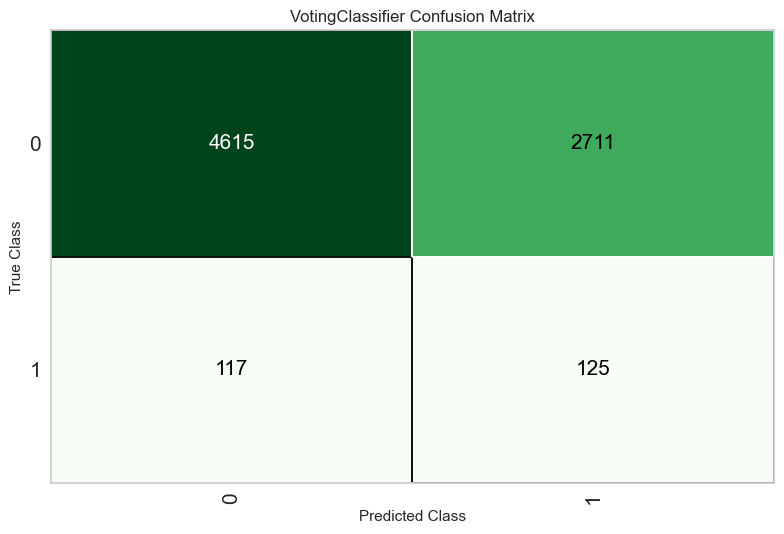

In [22]:
plot_model(blended_model, plot = 'confusion_matrix')

In [23]:
print(blended_model)

VotingClassifier(estimators=[('Logistic Regression',
                              Pipeline(memory=FastMemory(location=C:\Users\A3F28~1.VAK\AppData\Local\Temp\joblib),
                                       steps=[('numerical_imputer',
                                               TransformerWrapper(exclude=None,
                                                                  include=['Gender',
                                                                           'Diabetes',
                                                                           'Positive '
                                                                           'family '
                                                                           'history',
                                                                           'Dyslipidemia',
                                                                           'Current '
                                                                           'c

In [24]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Nov  6 10:06:52 2018

@author: yandexdataschool

Original Code found in:
https://github.com/yandexdataschool/roc_comparison

updated: Raul Sanchez-Vazquez
"""
'The de long solution '

import numpy as np
import scipy.stats
from scipy import stats

# AUC comparison adapted from
# https://github.com/Netflix/vmaf/
def compute_midrank(x):
    """Computes midranks.
    Args:
       x - a 1D numpy array
    Returns:
       array of midranks
    """
    J = np.argsort(x)
    Z = x[J]
    N = len(x)
    T = np.zeros(N, dtype=float)
    i = 0
    while i < N:
        j = i
        while j < N and Z[j] == Z[i]:
            j += 1
        T[i:j] = 0.5*(i + j - 1)
        i = j
    T2 = np.empty(N, dtype=float)
    # Note(kazeevn) +1 is due to Python using 0-based indexing
    # instead of 1-based in the AUC formula in the paper
    T2[J] = T + 1
    return T2


def compute_midrank_weight(x, sample_weight):
    """Computes midranks.
    Args:
       x - a 1D numpy array
    Returns:
       array of midranks
    """
    J = np.argsort(x)
    Z = x[J]
    cumulative_weight = np.cumsum(sample_weight[J])
    N = len(x)
    T = np.zeros(N, dtype=float)
    i = 0
    while i < N:
        j = i
        while j < N and Z[j] == Z[i]:
            j += 1
        T[i:j] = cumulative_weight[i:j].mean()
        i = j
    T2 = np.empty(N, dtype=float)
    T2[J] = T
    return T2


def fastDeLong(predictions_sorted_transposed, label_1_count, sample_weight):
    if sample_weight is None:
        return fastDeLong_no_weights(predictions_sorted_transposed, label_1_count)
    else:
        return fastDeLong_weights(predictions_sorted_transposed, label_1_count, sample_weight)


def fastDeLong_weights(predictions_sorted_transposed, label_1_count, sample_weight):
    """
    The fast version of DeLong's method for computing the covariance of
    unadjusted AUC.
    Args:
       predictions_sorted_transposed: a 2D numpy.array[n_classifiers, n_examples]
          sorted such as the examples with label "1" are first
    Returns:
       (AUC value, DeLong covariance)
    Reference:
     @article{sun2014fast,
       title={Fast Implementation of DeLong's Algorithm for
              Comparing the Areas Under Correlated Receiver Oerating Characteristic Curves},
       author={Xu Sun and Weichao Xu},
       journal={IEEE Signal Processing Letters},
       volume={21},
       number={11},
       pages={1389--1393},
       year={2014},
       publisher={IEEE}
     }
    """
    # Short variables are named as they are in the paper
    m = label_1_count
    n = predictions_sorted_transposed.shape[1] - m
    positive_examples = predictions_sorted_transposed[:, :m]
    negative_examples = predictions_sorted_transposed[:, m:]
    k = predictions_sorted_transposed.shape[0]

    tx = np.empty([k, m], dtype=float)
    ty = np.empty([k, n], dtype=float)
    tz = np.empty([k, m + n], dtype=float)
    for r in range(k):
        tx[r, :] = compute_midrank_weight(positive_examples[r, :], sample_weight[:m])
        ty[r, :] = compute_midrank_weight(negative_examples[r, :], sample_weight[m:])
        tz[r, :] = compute_midrank_weight(predictions_sorted_transposed[r, :], sample_weight)
    total_positive_weights = sample_weight[:m].sum()
    total_negative_weights = sample_weight[m:].sum()
    pair_weights = np.dot(sample_weight[:m, np.newaxis], sample_weight[np.newaxis, m:])
    total_pair_weights = pair_weights.sum()
    aucs = (sample_weight[:m]*(tz[:, :m] - tx)).sum(axis=1) / total_pair_weights
    v01 = (tz[:, :m] - tx[:, :]) / total_negative_weights
    v10 = 1. - (tz[:, m:] - ty[:, :]) / total_positive_weights
    sx = np.cov(v01)
    sy = np.cov(v10)
    delongcov = sx / m + sy / n
    return aucs, delongcov


def fastDeLong_no_weights(predictions_sorted_transposed, label_1_count):
    """
    The fast version of DeLong's method for computing the covariance of
    unadjusted AUC.
    Args:
       predictions_sorted_transposed: a 2D numpy.array[n_classifiers, n_examples]
          sorted such as the examples with label "1" are first
    Returns:
       (AUC value, DeLong covariance)
    Reference:
     @article{sun2014fast,
       title={Fast Implementation of DeLong's Algorithm for
              Comparing the Areas Under Correlated Receiver Oerating
              Characteristic Curves},
       author={Xu Sun and Weichao Xu},
       journal={IEEE Signal Processing Letters},
       volume={21},
       number={11},
       pages={1389--1393},
       year={2014},
       publisher={IEEE}
     }
    """
    # Short variables are named as they are in the paper
    m = label_1_count
    n = predictions_sorted_transposed.shape[1] - m
    positive_examples = predictions_sorted_transposed[:, :m]
    negative_examples = predictions_sorted_transposed[:, m:]
    k = predictions_sorted_transposed.shape[0]

    tx = np.empty([k, m], dtype=float)
    ty = np.empty([k, n], dtype=float)
    tz = np.empty([k, m + n], dtype=float)
    for r in range(k):
        tx[r, :] = compute_midrank(positive_examples[r, :])
        ty[r, :] = compute_midrank(negative_examples[r, :])
        tz[r, :] = compute_midrank(predictions_sorted_transposed[r, :])
    aucs = tz[:, :m].sum(axis=1) / m / n - float(m + 1.0) / 2.0 / n
    v01 = (tz[:, :m] - tx[:, :]) / n
    v10 = 1.0 - (tz[:, m:] - ty[:, :]) / m
    sx = np.cov(v01)
    sy = np.cov(v10)
    delongcov = sx / m + sy / n
    return aucs, delongcov


def calc_pvalue(aucs, sigma):
    """Computes log(10) of p-values.
    Args:
       aucs: 1D array of AUCs
       sigma: AUC DeLong covariances
    Returns:
       log10(pvalue)
    """
    l = np.array([[1, -1]])
    z = np.abs(np.diff(aucs)) / np.sqrt(np.dot(np.dot(l, sigma), l.T))
    return np.log10(2) + scipy.stats.norm.logsf(z, loc=0, scale=1) / np.log(10)


def compute_ground_truth_statistics(ground_truth, sample_weight):
    assert np.array_equal(np.unique(ground_truth), [0, 1])
    order = (-ground_truth).argsort()
    label_1_count = int(ground_truth.sum())
    if sample_weight is None:
        ordered_sample_weight = None
    else:
        ordered_sample_weight = sample_weight[order]

    return order, label_1_count, ordered_sample_weight


def delong_roc_variance(ground_truth, predictions, sample_weight=None):
    """
    Computes ROC AUC variance for a single set of predictions
    Args:
       ground_truth: np.array of 0 and 1
       predictions: np.array of floats of the probability of being class 1
    """
    order, label_1_count, ordered_sample_weight = compute_ground_truth_statistics(
        ground_truth, sample_weight)
    predictions_sorted_transposed = predictions[np.newaxis, order]
    aucs, delongcov = fastDeLong(predictions_sorted_transposed, label_1_count, ordered_sample_weight)
    assert len(aucs) == 1, "There is a bug in the code, please forward this to the developers"
    return aucs[0], delongcov

df_blended['Tamponade'].values, df_blended['prediction_score_1'].values
alpha = .95
y_pred = df_blended['prediction_score_1'].values
y_true = df_blended['Tamponade'].values

auc, auc_cov = delong_roc_variance(
    y_true,
    y_pred)

auc_std = np.sqrt(auc_cov)
lower_upper_q = np.abs(np.array([0, 1]) - (1 - alpha) / 2)

ci = stats.norm.ppf(
    lower_upper_q,
    loc=auc,
    scale=auc_std)

ci[ci > 1] = 1

print('AUC:', auc)
print('AUC COV:', auc_cov)
print('95% AUC CI:', ci)

AUC: 0.6167831994278274
AUC COV: 0.00031371045828037077
95% AUC CI: [0.58206857 0.65149783]


Transformation Pipeline and Model Successfully Loaded


In [14]:
lo_lr = load_model('lr')

Transformation Pipeline and Model Successfully Loaded


In [10]:
lo_nb = load_model('nb')

Transformation Pipeline and Model Successfully Loaded


In [11]:
lo_lightgbm = load_model('lightgbm')

Transformation Pipeline and Model Successfully Loaded


In [12]:
lo_ada = load_model('ada')

Transformation Pipeline and Model Successfully Loaded


In [13]:
lo_rf = load_model('rf')

Transformation Pipeline and Model Successfully Loaded


In [14]:
lo_blended = load_model('blended_model')

Transformation Pipeline and Model Successfully Loaded


In [10]:
df_ada=predict_model(lo_ada, raw_score=True)
false_positive_rate_ada, true_positive_rate_ada, threshold_ada = roc_curve(df_ada['Tamponade'].values, df_ada['prediction_score_1'].values)
auc_ada = round(metrics.roc_auc_score(df_ada['Tamponade'].values, df_ada['prediction_score_1'].values), 4) 
df_ada.head()

df_lightgbm=predict_model(lo_lightgbm, raw_score=True)
false_positive_rate_lightgbm, true_positive_rate_lightgbm, threshold_lightgbm = roc_curve(df_lightgbm['Tamponade'].values,df_lightgbm['prediction_score_1'].values)
auc_lightgbm = round(metrics.roc_auc_score(df_lightgbm['Tamponade'].values, df_lightgbm['prediction_score_1'].values), 4) 
df_lightgbm.head()

df_lr=predict_model(lo_lr, raw_score=True)
false_positive_rate_lr, true_positive_rate_lr, threshold_lr = roc_curve(df_lr['Tamponade'].values, df_lr['prediction_score_1'].values)
auc_lr = round(metrics.roc_auc_score(df_lr['Tamponade'].values, df_lr['prediction_score_1'].values), 4) 
df_lr.head()

df_rf=predict_model(lo_rf, raw_score=True)
false_positive_rate_rf, true_positive_rate_rf, threshold_rf = roc_curve(df_rf['Tamponade'].values,df_rf['prediction_score_1'].values)
auc_rf = round(metrics.roc_auc_score(df_rf['Tamponade'].values, df_rf['prediction_score_1'].values), 4) 
df_rf.head()

df_nb=predict_model(lo_nb, raw_score=True)
false_positive_rate_nb, true_positive_rate_nb, threshold_nb = roc_curve(df_nb['Tamponade'].values,df_nb['prediction_score_1'].values)
auc_nb = round(metrics.roc_auc_score(df_nb['Tamponade'].values, df_nb['prediction_score_1'].values), 4) 
df_nb.head()

df_blended=predict_model(lo_blended, raw_score=True)
false_positive_rate_blended, true_positive_rate_blended, threshold_blended = roc_curve(df_blended['Tamponade'].values, df_blended['prediction_score_1'].values)
auc_blended = round(metrics.roc_auc_score(df_blended['Tamponade'].values, df_blended['prediction_score_1'].values), 4) 
df_blended.head()

NameError: name 'lo_ada' is not defined

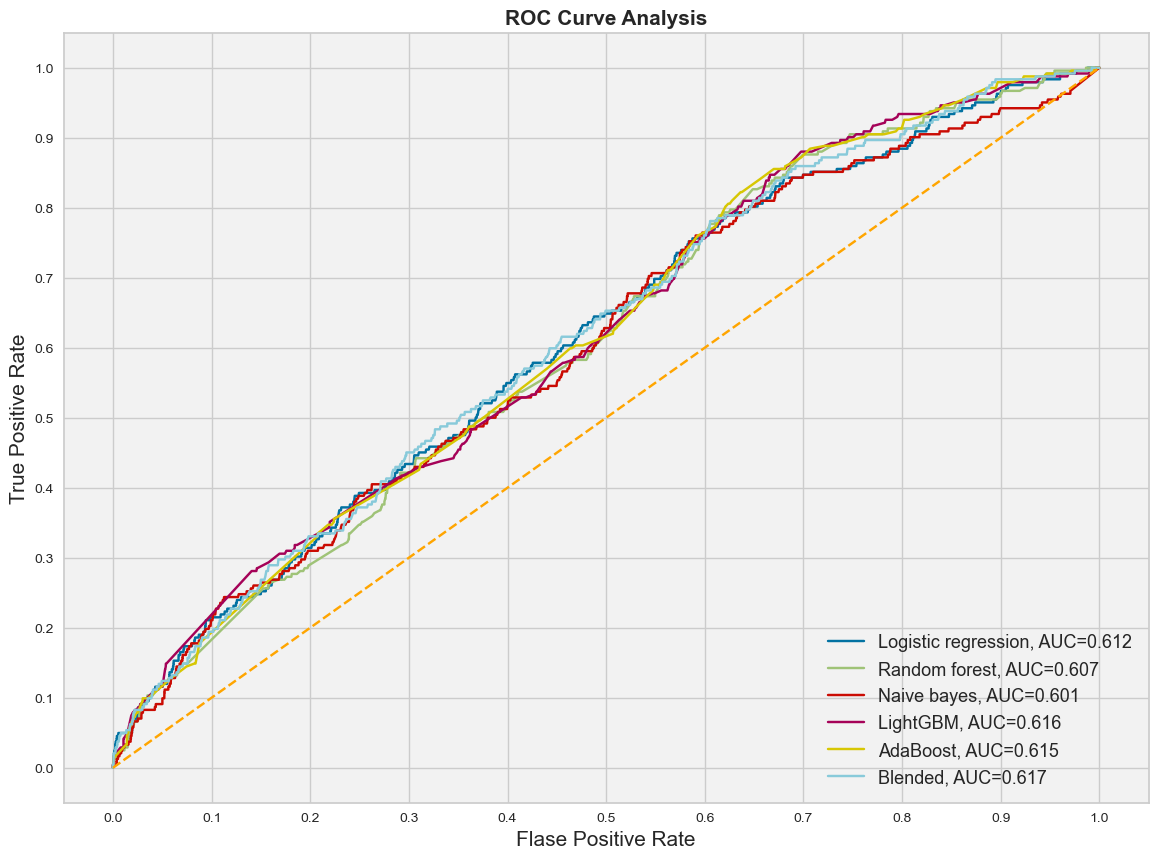

In [16]:
fig = plt.figure(figsize=(14,10))

ax = plt.axes()
ax.set_facecolor((0.95, 0.95, 0.95))

plt.plot(false_positive_rate_lr, 
             true_positive_rate_lr,
             label="Logistic regression, AUC={:.3f}".format(auc_lr))
plt.plot(false_positive_rate_rf, 
             true_positive_rate_rf,
             label="Random forest, AUC={:.3f}".format(auc_rf))
plt.plot(false_positive_rate_nb, 
             true_positive_rate_nb,
             label="Naive bayes, AUC={:.3f}".format(auc_nb))
plt.plot(false_positive_rate_lightgbm, 
             true_positive_rate_lightgbm,
             label="LightGBM, AUC={:.3f}".format(auc_lightgbm))
plt.plot(false_positive_rate_ada, 
             true_positive_rate_ada,
             label="AdaBoost, AUC={:.3f}".format(auc_ada))
plt.plot(false_positive_rate_blended, 
             true_positive_rate_blended,
             label="Blended, AUC={:.3f}".format(auc_blended))

# Setting the background color of the plot
# using set_facecolor() method

    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')


In [45]:
#stacked_model = stack_models([lo_lr,lo_lightgbm,lo_rf])

In [38]:
#blended_model = blend_models([lo_lr,lo_lightgbm,lo_rf],method= 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
Fold,,,,,,,,
0,0.9666,0.6451,0.0000,0.0000,0.0000,-0.0032,-0.0075,0.9982
1,0.9660,0.7041,0.0175,0.2000,0.0323,0.0272,0.0506,0.9977
2,0.9649,0.6502,0.0000,0.0000,0.0000,-0.0052,-0.0097,0.9971
3,0.9672,0.6540,0.0175,0.3333,0.0333,0.0302,0.0703,0.9988
4,0.9672,0.6498,0.0000,0.0000,0.0000,-0.0011,-0.0043,0.9994
5,0.9655,0.5803,0.0000,0.0000,0.0000,-0.0043,-0.0087,0.9977
6,0.9666,0.5696,0.0000,0.0000,0.0000,-0.0032,-0.0075,0.9982
7,0.9671,0.5903,0.0000,0.0000,0.0000,-0.0022,-0.0061,0.9988
8,0.9671,0.6113,0.0179,0.2500,0.0333,0.0292,0.0594,0.9982


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [39]:
#predict_model(blended_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity
0,Voting Classifier,0.9664,0.5865,0.0083,0.1250,0.0155,0.0116,0.0243,0.9981


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


,Hypertansion,Diabetes,Positive.family.history,Dyslipidemia,CigaretteSmokingCurrent,OpiumConsumption,MI1_7,Pro.Anticoagulants,Pro.Antiplatelets,Pro.Aspirin,...,LM.disease,Age,EF,Hb,Cr,StatusofProcedure,Type.of.surgery,Tamponade,prediction_label,prediction_score
17661,1,0,1,1,0,2,0,0,0,1,...,0,56,40.0,14.80,0.81,0,0,0,0,0.8427
55,0,1,0,1,0,0,0,1,0,0,...,0,76,50.0,10.42,0.91,0,1,0,0,0.6968
2561,1,1,0,1,0,0,0,1,0,1,...,0,78,45.0,10.70,0.80,1,0,0,0,0.8097
12670,0,1,0,0,0,0,0,0,1,1,...,1,58,55.0,15.00,1.20,0,1,0,0,0.5293
1085,1,1,0,1,0,0,0,0,0,0,...,0,61,40.0,12.10,1.04,0,0,0,0,0.8417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6108,1,1,0,1,0,0,0,0,0,0,...,0,75,45.0,14.60,1.14,0,0,0,0,0.8029
3474,1,0,0,1,0,0,0,1,0,1,...,1,79,60.0,13.20,1.50,0,0,0,0,0.7020
16180,0,0,0,0,0,0,0,0,0,1,...,0,61,35.0,17.10,1.20,0,1,0,0,0.5380
21447,1,1,0,1,0,0,0,0,0,1,...,0,69,45.0,13.90,0.40,0,0,0,0,0.8324


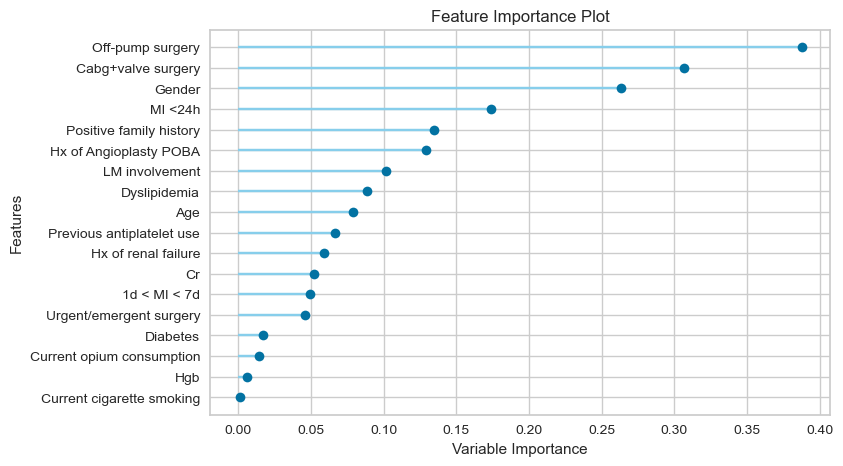

In [17]:
#evaluate_model(lo_lightgbm)
plot_model(lo_lr, plot='feature_all')

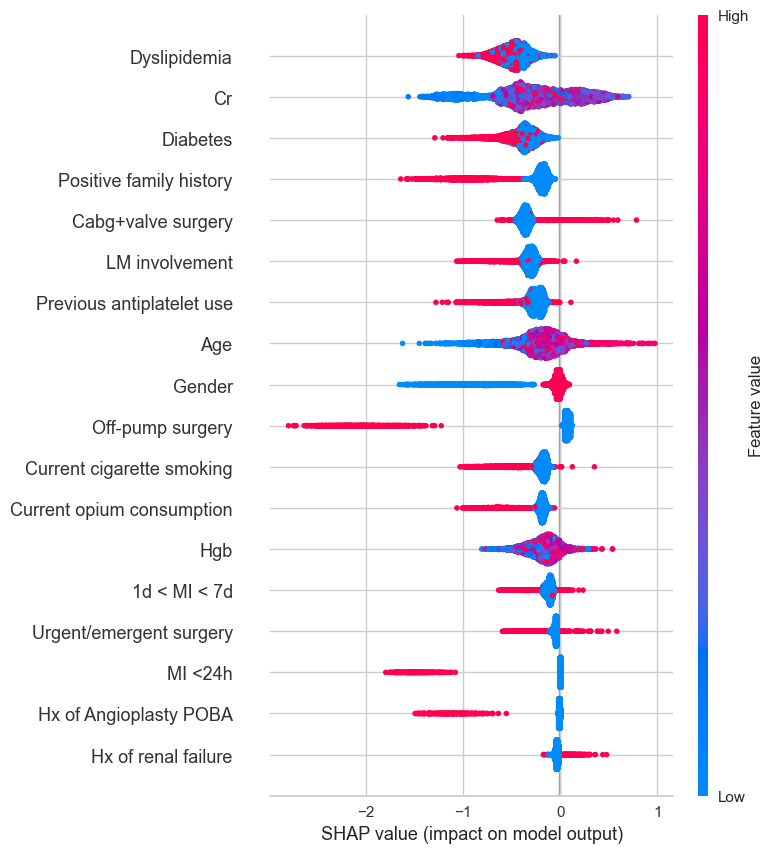

In [22]:
interpret_model(lightgbm)
#evaluate_model(lo_lr)

In [23]:
explainer=shap.Explainer(lightgbm.predict, X_test)
shap_values=explainer(X_test)

Permutation explainer: 7569it [07:16, 17.08it/s]                          


In [24]:
X_test.head()

,Gender,Diabetes,Positive family history,Dyslipidemia,Current cigarette smoking,Current opium consumption,Hx of Angioplasty POBA,Hx of renal failure,MI <24h,1d < MI < 7d,Previous antiplatelet use,LM involvement,Age,Hgb,Cr,Urgent/emergent surgery,Off-pump surgery,Cabg+valve surgery
17661,0.554943,-0.838790,2.107815,1.066551,-0.522585,-0.41315,-0.15951,-0.218136,-0.133399,-0.296918,-0.461773,-0.447497,-1.212087,0.546467,-0.403656,-0.230978,-0.248174,-0.377104
55,0.554943,1.309356,-0.524520,1.066551,-0.522585,-0.41315,-0.15951,-0.218136,-0.133399,-0.296918,-0.461773,-0.447497,0.857546,-1.979204,-0.231996,-0.230978,-0.248174,3.126060
2561,0.554943,1.309356,-0.524520,1.066551,-0.522585,-0.41315,-0.15951,-0.218136,-0.133399,-0.296918,-0.461773,-0.447497,1.064510,-1.817745,-0.420822,5.049386,-0.248174,-0.377104
12670,0.554943,1.309356,-0.524520,-1.035552,-0.522585,-0.41315,-0.15951,-0.218136,-0.133399,-0.296918,2.453408,2.569849,-1.005124,0.661795,0.265819,-0.230978,-0.248174,3.126060
1085,0.554943,1.309356,-0.524520,1.066551,-0.522585,-0.41315,-0.15951,-0.218136,-0.133399,-0.296918,-0.461773,-0.447497,-0.694679,-1.010453,-0.008838,-0.230978,4.263558,-0.377104


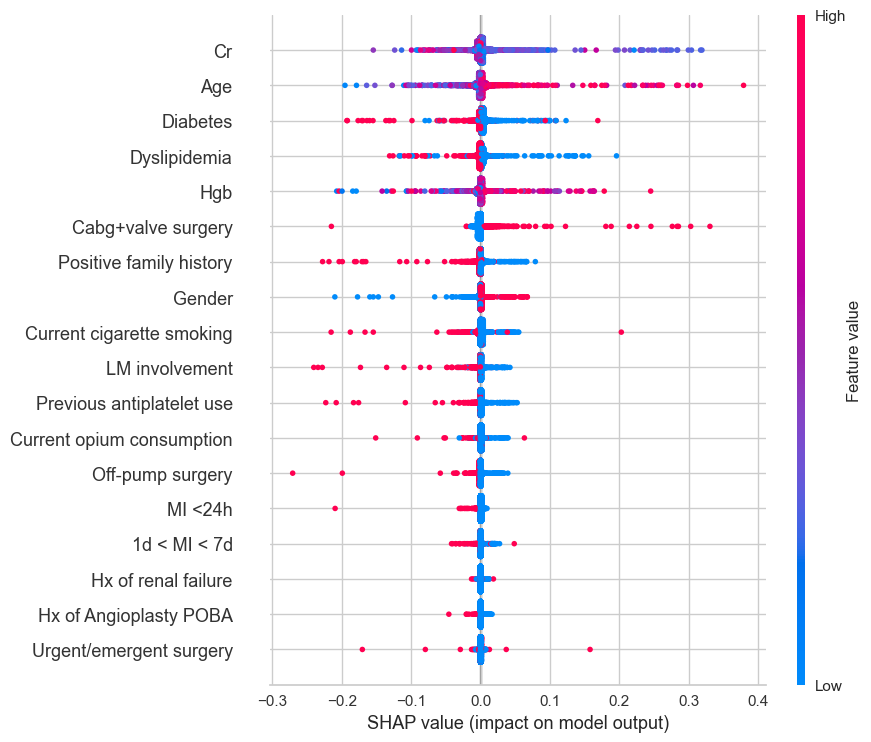

In [25]:
shap.plots.beeswarm(shap_values, max_display=20)

In [26]:
explainer=shap.Explainer(lightgbm.predict, X_train)
shap_values=explainer(X_train)

Permutation explainer: 34183it [38:38, 14.67it/s]                           


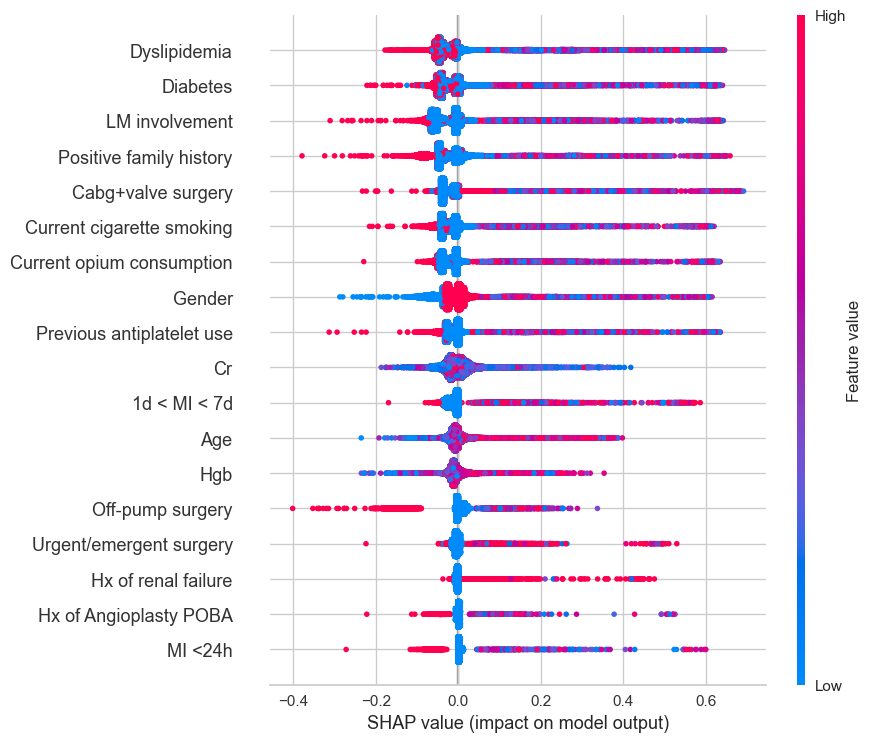

In [27]:
shap.plots.beeswarm(shap_values, max_display=20)